# **Customer Churn Prediction Model**

---



## **Business Understanding**

---



Perkembangan industri telekomunikasi sangatlah
cepat, hal ini dapat dilihat dari **perilaku masyarakat yang menggunakan internet dalam berkomunikasi.** Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan **meningkatnya internet service provider** yang dapat **menimbulkan persaingan antar provider.**

Pelanggan memiliki **hak dalam memilih provider** yang sesuai dan **dapat beralih dari provider sebelumnya** yang diartikan sebagai Customer Churn. **Customer churn** adalah sebuah peristiwa dimana pelanggan yang memutuskan untuk berhenti berlangganan produk suatu perusahaan dan beralih untuk berlangganan produk serupa dari perusahaan lain. Peralihan ini dapat menyebabkan **berkurangnya pendapatan** bagi perusahaan telekomunikasi sehingga **penting untuk ditangani.**

Customer churn atau kehilangan pelanggan dari suatu bisnis dapat **diprediksi dengan menggunakan machine learning**. Model machine learning ini dapat **menentukan apakah pelanggan akan berhenti atau tidak** menggunakan bantuan algoritma klasifikasi supervised learning.

## **Data Understanding**

---



Dataset yang digunakan terdiri dari data train dan data test yang memiliki format Comma Separated Values (CSV).

Detail Data:
*   state : US State
*   account_length : Total bulan customer menjadi user telecommunication provider
*   area_code : Kode area
*   international_plan : Customer memiliki plan internasional
*   voice_mail_plan : Customer memiliki plan voice mail
*   number_vmail_messages : Total pesan voice mail
*   total_day_minutes : Total menit pada day calls
*   total_day_calls : Total day calls
*   total_day_charge : Total charge pada day calls
*   total_eve_minutes : Total menit pada evening calls
*   total_eve_calls : Total evening calls
*   total_eve_charge : Total charge pada evening calls
*   total_night_minutes : Total menit pada night calls
*   total_night_calls : Total night calls
*   total_night_charge : Total charge pada night calls
*   total_intl_minutes : Total menit pada international calls
*   total_intl_calls : Total international calls
*   total_intl_charge : Total charge pada international calls
*   number_customer_service_calls : Total call kepada customer service
*   churn : Customer churn

In [ ]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


## **Exploratory Data Analysis**

---



Exploratory Data Analysis digunakan untuk memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. EDA dilakukan dengan beberapa cara:

- Univariat Analysis — analisis deskriptif dengan satu variabel.
- Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
- Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, auc
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [ ]:
#Load Data
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

df_train.name = 'Training Set'
df_test.name = 'Testing Set'

### **Melihat Data**

---

In [ ]:
#Menampilkan 5 baris random dari dataset train
df_train.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3536,WY,62,area_code_415,no,no,0,116.5,77,19.81,186.1,111,15.82,180.6,72,8.13,16.1,2,4.35,3,no
3449,MS,135,area_code_510,no,no,0,204.1,116,34.70,150.2,74,12.77,108.1,154,4.86,8.1,1,2.19,2,no
1947,NM,118,area_code_415,no,yes,42,148.7,105,25.28,167.3,105,14.22,270.6,105,12.18,10.4,7,2.81,0,no
1659,RI,116,area_code_510,no,no,0,137.4,126,23.36,120.0,94,10.20,130.3,64,5.86,12.4,2,3.35,3,no
2713,WA,143,area_code_510,no,no,0,160.4,120,27.27,285.9,104,24.30,182.5,85,8.21,6.9,4,1.86,3,no


In [ ]:
#Menampilkan 5 baris random dari dataset test
df_test.sample(5)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
340,341,TX,86,area_code_510,no,no,0,92.8,92,15.78,159.6,87,13.57,148.7,115,6.69,8.8,5,2.38,1
439,440,WI,95,area_code_408,no,no,0,237.3,83,40.34,154.0,65,13.09,237.0,105,10.67,11.2,6,3.02,1
187,188,AL,16,area_code_408,no,no,0,209.5,89,35.62,172.8,85,14.69,94.1,102,4.23,8.8,4,2.38,1
596,597,VA,94,area_code_415,no,no,0,208.1,72,35.38,188.0,79,15.98,162.0,96,7.29,4.6,5,1.24,2
469,470,MI,110,area_code_510,no,no,0,18.9,92,3.21,258.4,81,21.96,109.6,74,4.93,14.8,4,4.00,1


### **Mencari Gambaran Umum Data**

---



In [ ]:
#Menampilkan info dari dataset train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#Menampilkan info dari dataset test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

### **Descriptive Statistic Data**

---

In [ ]:
#Memperoleh statistik deskriptif dari semua kolom numerikal dari dataset train
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Memperoleh statistik deskriptif dari semua kolom numerikal dari dataset test
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


### **Mengetahui Jumlah Baris dan Kolom dari Data**

---

In [ ]:
print('Data Train Shape = {}'.format(df_train.shape))
print('Data Test Shape = {}'.format(df_test.shape))

Data Train Shape = (4250, 20)
Data Test Shape = (750, 20)


### **Menentukan Data Kategorikal dan Data Numerikal serta Data Kontinu dan Data Diskrit**

---

In [ ]:
cat_train = df_train.select_dtypes(include='object').columns
print('Data Kategorikal Data Train: ', cat_train)
cat_test = df_test.select_dtypes(include='object').columns
print('\nData Kategorikal Data Test: ', cat_test)
num_train = df_train.select_dtypes(include='number').columns
print('\nData Numerical Data Train: ', num_train)
num_test = df_test.select_dtypes(include='number').columns
print('\nData Numerical Data Test: ', num_test)
con_train = df_train.select_dtypes(include=float).columns
print('\nData Kontinue Data Train: ', con_train)
con_test = df_test.select_dtypes(include=float).columns
print('\nData Kontinue Data Test: ', con_test)
disk_train = df_train.select_dtypes(include=int).columns
print('\nData Diskrit Data Train: ', disk_train)
disk_test = df_test.select_dtypes(include=int).columns
print('\nData Diskrit Data Test: ', disk_test)

Data Kategorikal Data Train:  Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

Data Kategorikal Data Test:  Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

Data Numerical Data Train:  Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

Data Numerical Data Test:  Index(['id', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls'

### **Mengecek Duplikasi Data**

---

In [ ]:
#Check Duplicate
print('Apakah terdapat duplikat data pada data train? {}'.format(df_train.duplicated().values.any()))
print('Apakah terdapat duplikat data pada data test? {}'.format(df_test.duplicated(subset='id').values.any()))

Apakah terdapat duplikat data pada data train? False
Apakah terdapat duplikat data pada data test? False


### **Mengecek Missing Value**

---

In [ ]:
#Check Missing Value
print('Apakah terdapat missing value pada data train? = {}'.format(df_train.isnull().values.any()))
print('Apakah terdapat missing value pada data test? = {}'.format(df_test.isnull().values.any()))

Apakah terdapat missing value pada data train? = False
Apakah terdapat missing value pada data test? = False


### **Mengecek Outliers**

---

In [ ]:
def check_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
  return outlier

In [ ]:
print('Outliers pada Data Train:')
print(check_outliers(df_train[num_train]).sum())

print('\nOutliers pada Data Test:')
print(check_outliers(df_test[num_test]).sum())

Outliers pada Data Train:
account_length                    20
number_vmail_messages             86
total_day_minutes                 25
total_day_calls                   28
total_day_charge                  26
total_eve_minutes                 34
total_eve_calls                   24
total_eve_charge                  34
total_night_minutes               37
total_night_calls                 33
total_night_charge                37
total_intl_minutes                62
total_intl_calls                 100
total_intl_charge                 62
number_customer_service_calls    335
dtype: int64

Outliers pada Data Test:
id                                0
account_length                    6
number_vmail_messages             0
total_day_minutes                 9
total_day_calls                   7
total_day_charge                  9
total_eve_minutes                 8
total_eve_calls                   5
total_eve_charge                  8
total_night_minutes               3
total_night_calls   

### **Mencari Nilai Unik : Mengecek apakah ada data yang inkonsisten?**

---

In [ ]:
#Melihat data unik kolom kategorikal dari data train
for column in cat_train:
    print('\nDataset train : nilai unik dari kolom', column)
    print(df_train[column].unique())
    print('Jumlah nilai unik = {}'.format(df_train[column].nunique()))


Dataset train : nilai unik dari kolom state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
Jumlah nilai unik = 51

Dataset train : nilai unik dari kolom area_code
['area_code_415' 'area_code_408' 'area_code_510']
Jumlah nilai unik = 3

Dataset train : nilai unik dari kolom international_plan
['no' 'yes']
Jumlah nilai unik = 2

Dataset train : nilai unik dari kolom voice_mail_plan
['yes' 'no']
Jumlah nilai unik = 2

Dataset train : nilai unik dari kolom churn
['no' 'yes']
Jumlah nilai unik = 2


In [ ]:
#Melihat data unik kolom kategorikal dari data test
for column in cat_test:
    print('\nDataset test : nilai unik dari kolom', column)
    print(df_test[column].unique())
    print('Jumlah nilai unik = {}'.format(df_test[column].nunique()))


Dataset test : nilai unik dari kolom state
['KS' 'AL' 'IA' 'VT' 'NE' 'IL' 'LA' 'GA' 'NJ' 'ID' 'WY' 'WI' 'MN' 'CO'
 'TX' 'AK' 'MA' 'MO' 'NY' 'FL' 'MI' 'WA' 'UT' 'SC' 'OK' 'DE' 'NH' 'PA'
 'AZ' 'MD' 'VA' 'IN' 'NM' 'MS' 'CT' 'RI' 'SD' 'MT' 'OR' 'ME' 'CA' 'OH'
 'AR' 'DC' 'ND' 'WV' 'NC' 'HI' 'NV' 'TN' 'KY']
Jumlah nilai unik = 51

Dataset test : nilai unik dari kolom area_code
['area_code_415' 'area_code_510' 'area_code_408']
Jumlah nilai unik = 3

Dataset test : nilai unik dari kolom international_plan
['no' 'yes']
Jumlah nilai unik = 2

Dataset test : nilai unik dari kolom voice_mail_plan
['yes' 'no']
Jumlah nilai unik = 2


In [ ]:
#Melihat jumlah data unik kolom numerikal dari data train
for column in num_train:
    print('\nDataset train kolom', column)
    print('Jumlah nilai unik = {}'.format(df_train[column].nunique()))


Dataset train kolom account_length
Jumlah nilai unik = 215

Dataset train kolom number_vmail_messages
Jumlah nilai unik = 46

Dataset train kolom total_day_minutes
Jumlah nilai unik = 1843

Dataset train kolom total_day_calls
Jumlah nilai unik = 120

Dataset train kolom total_day_charge
Jumlah nilai unik = 1843

Dataset train kolom total_eve_minutes
Jumlah nilai unik = 1773

Dataset train kolom total_eve_calls
Jumlah nilai unik = 123

Dataset train kolom total_eve_charge
Jumlah nilai unik = 1572

Dataset train kolom total_night_minutes
Jumlah nilai unik = 1757

Dataset train kolom total_night_calls
Jumlah nilai unik = 128

Dataset train kolom total_night_charge
Jumlah nilai unik = 992

Dataset train kolom total_intl_minutes
Jumlah nilai unik = 168

Dataset train kolom total_intl_calls
Jumlah nilai unik = 21

Dataset train kolom total_intl_charge
Jumlah nilai unik = 168

Dataset train kolom number_customer_service_calls
Jumlah nilai unik = 10


In [ ]:
#Melihat jumlah data unik kolom numerikal dari data test
for column in num_test:
    print('\nDataset test kolom', column)
    print('Jumlah nilai unik = {}'.format(df_test[column].nunique()))


Dataset test kolom id
Jumlah nilai unik = 750

Dataset test kolom account_length
Jumlah nilai unik = 175

Dataset test kolom number_vmail_messages
Jumlah nilai unik = 39

Dataset test kolom total_day_minutes
Jumlah nilai unik = 619

Dataset test kolom total_day_calls
Jumlah nilai unik = 100

Dataset test kolom total_day_charge
Jumlah nilai unik = 619

Dataset test kolom total_eve_minutes
Jumlah nilai unik = 611

Dataset test kolom total_eve_calls
Jumlah nilai unik = 102

Dataset test kolom total_eve_charge
Jumlah nilai unik = 584

Dataset test kolom total_night_minutes
Jumlah nilai unik = 628

Dataset test kolom total_night_calls
Jumlah nilai unik = 97

Dataset test kolom total_night_charge
Jumlah nilai unik = 502

Dataset test kolom total_intl_minutes
Jumlah nilai unik = 135

Dataset test kolom total_intl_calls
Jumlah nilai unik = 17

Dataset test kolom total_intl_charge
Jumlah nilai unik = 135

Dataset test kolom number_customer_service_calls
Jumlah nilai unik = 7


### **Visualisasi**

---

**Visualisasi Kolom State : Ada berapa pelanggan yang masih berlangganan (no churn) dan berhenti berlangganan (churn) berdasarkan state?**

---



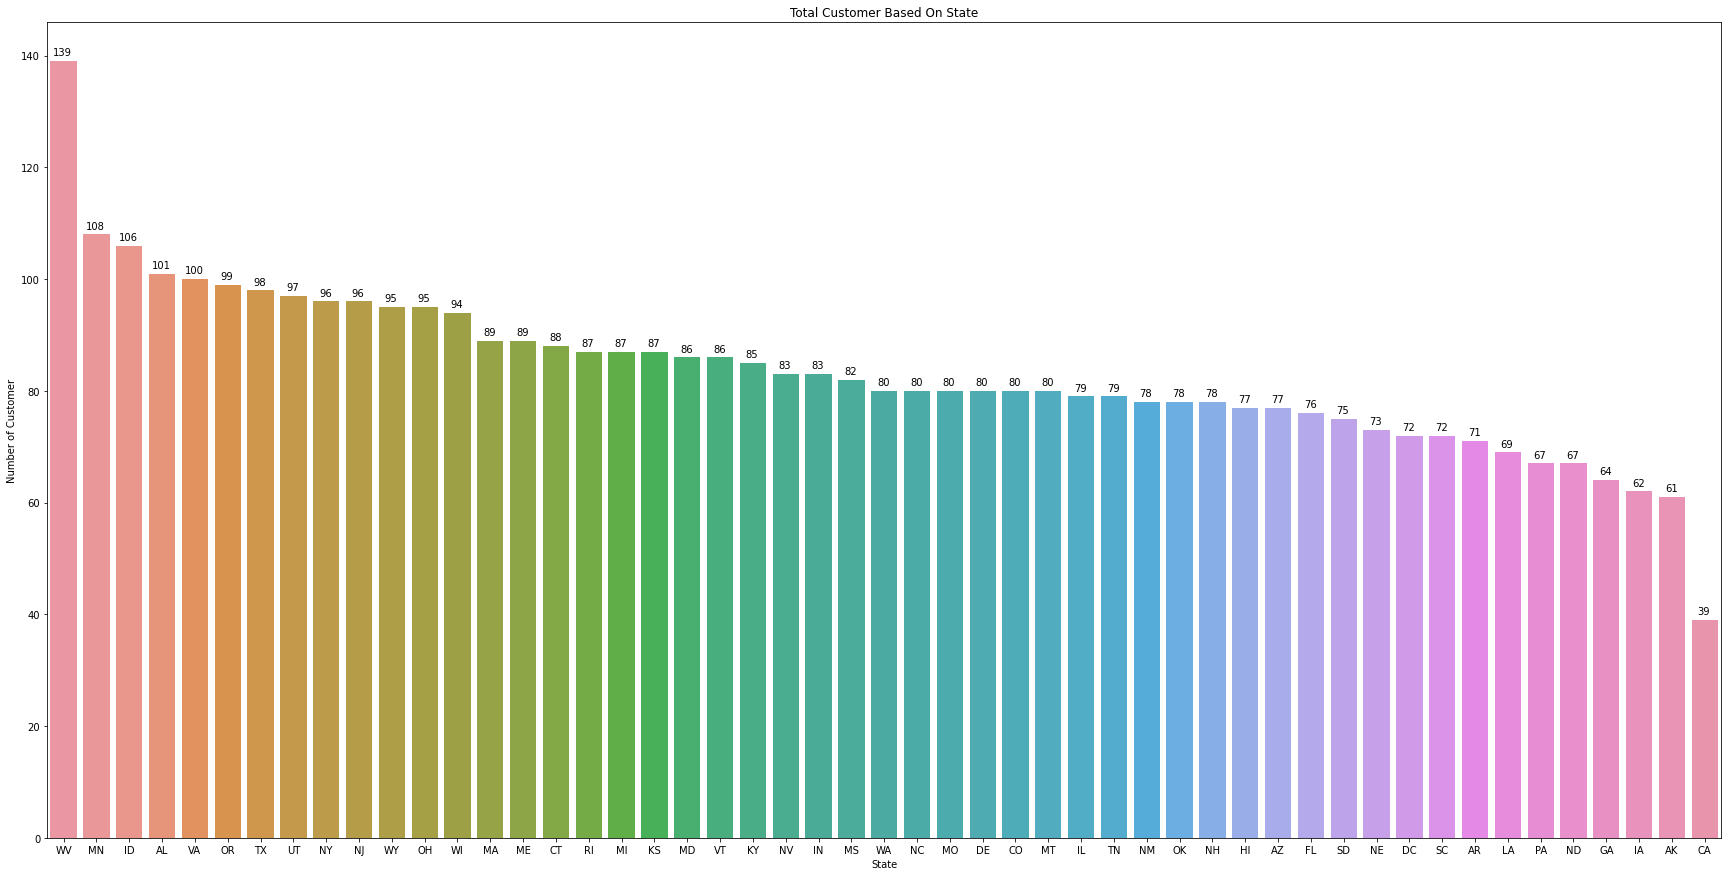

In [ ]:
#Count Plot
plt.figure(figsize=(30,15))
plt.title('Total Customer Based On State')
ax = sns.countplot(x='state', data= df_train, order=df_train['state'].value_counts(ascending=False).index)
plt.xlabel('State')
plt.ylabel('Number of Customer')

for p, label in zip(ax.patches, df_train['state'].value_counts().values ):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+1), ha='center')

plt.show()

- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) tertinggi ada di negara bagian dengan kode state WV yang totalnya **139** orang.
- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) terendah ada di negara bagian dengan kode state CA yang totalnya **39** orang.


In [ ]:
cust_churn = df_train[df_train['churn']=='yes']
cust_no_churn = df_train[df_train['churn']=='no']

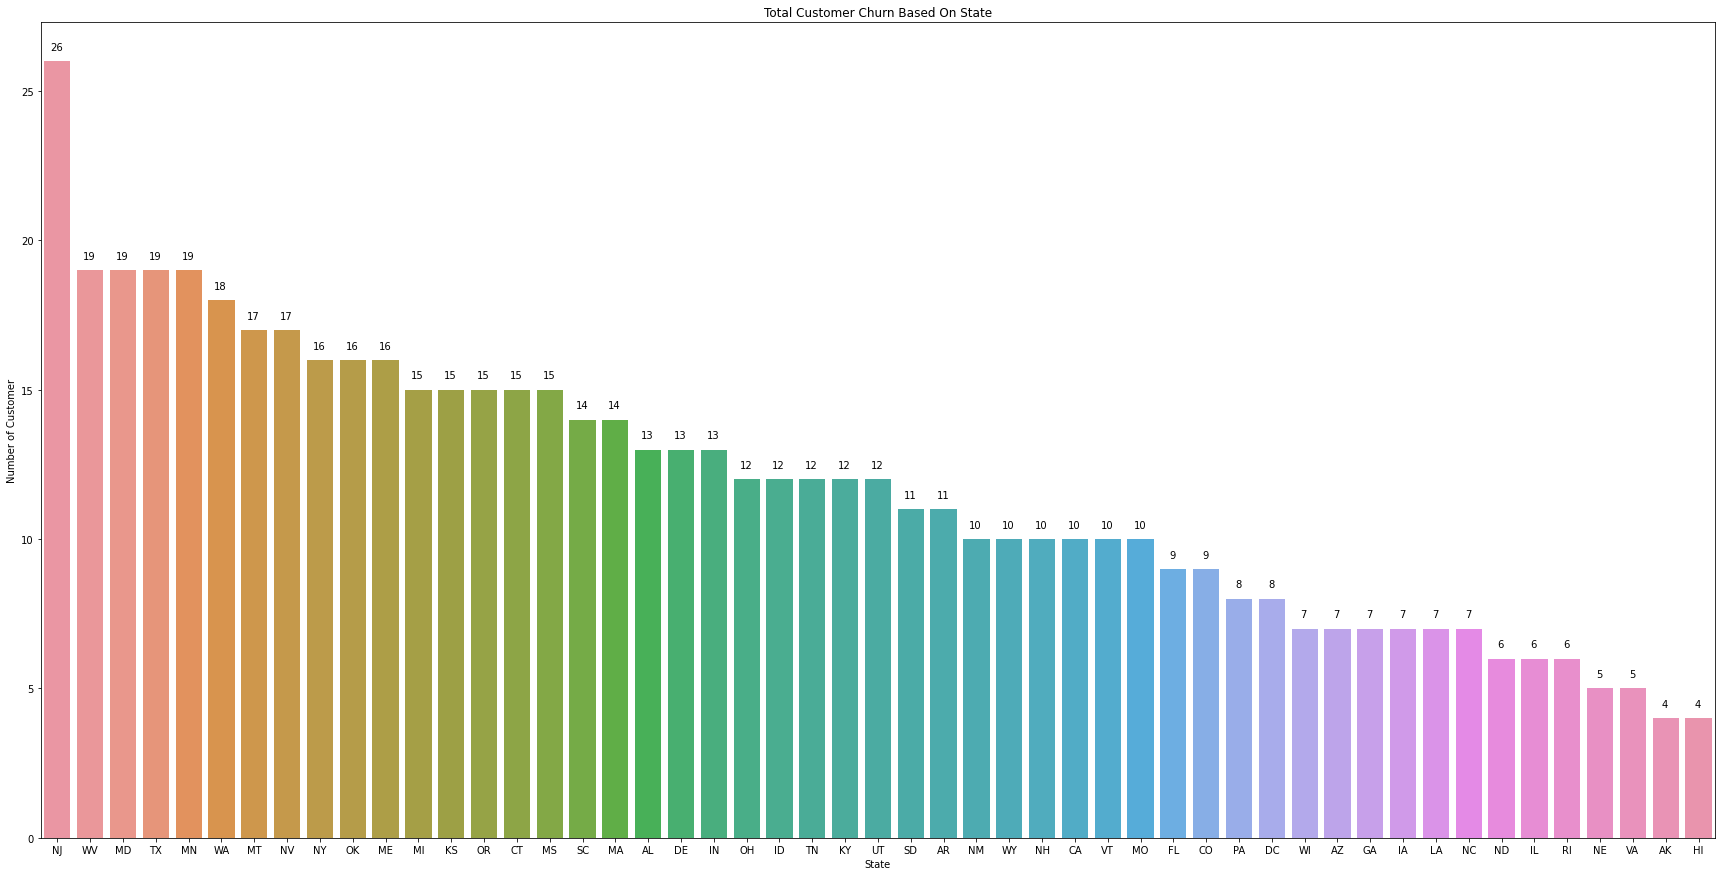

In [ ]:
#Count Plot
plt.figure(figsize=(30,15))
plt.title('Total Customer Churn Based On State')
ax = sns.countplot(x='state', data= cust_churn, order = cust_churn['state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Customer')

for p, label in zip(ax.patches, cust_churn['state'].value_counts().values ):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.375), ha='center')

plt.show()

- Jumlah pelanggan yang sudah tidak berlangganan (churn) terbanyak ada di negara bagian dengan kode NJ dengan total **26** orang.
- Jumlah pelanggan yang sudah tidak berlangganan (churn) tersedikit ada di negara bagian dengan kode HI dan AK dengan total masing-masing **4** orang.

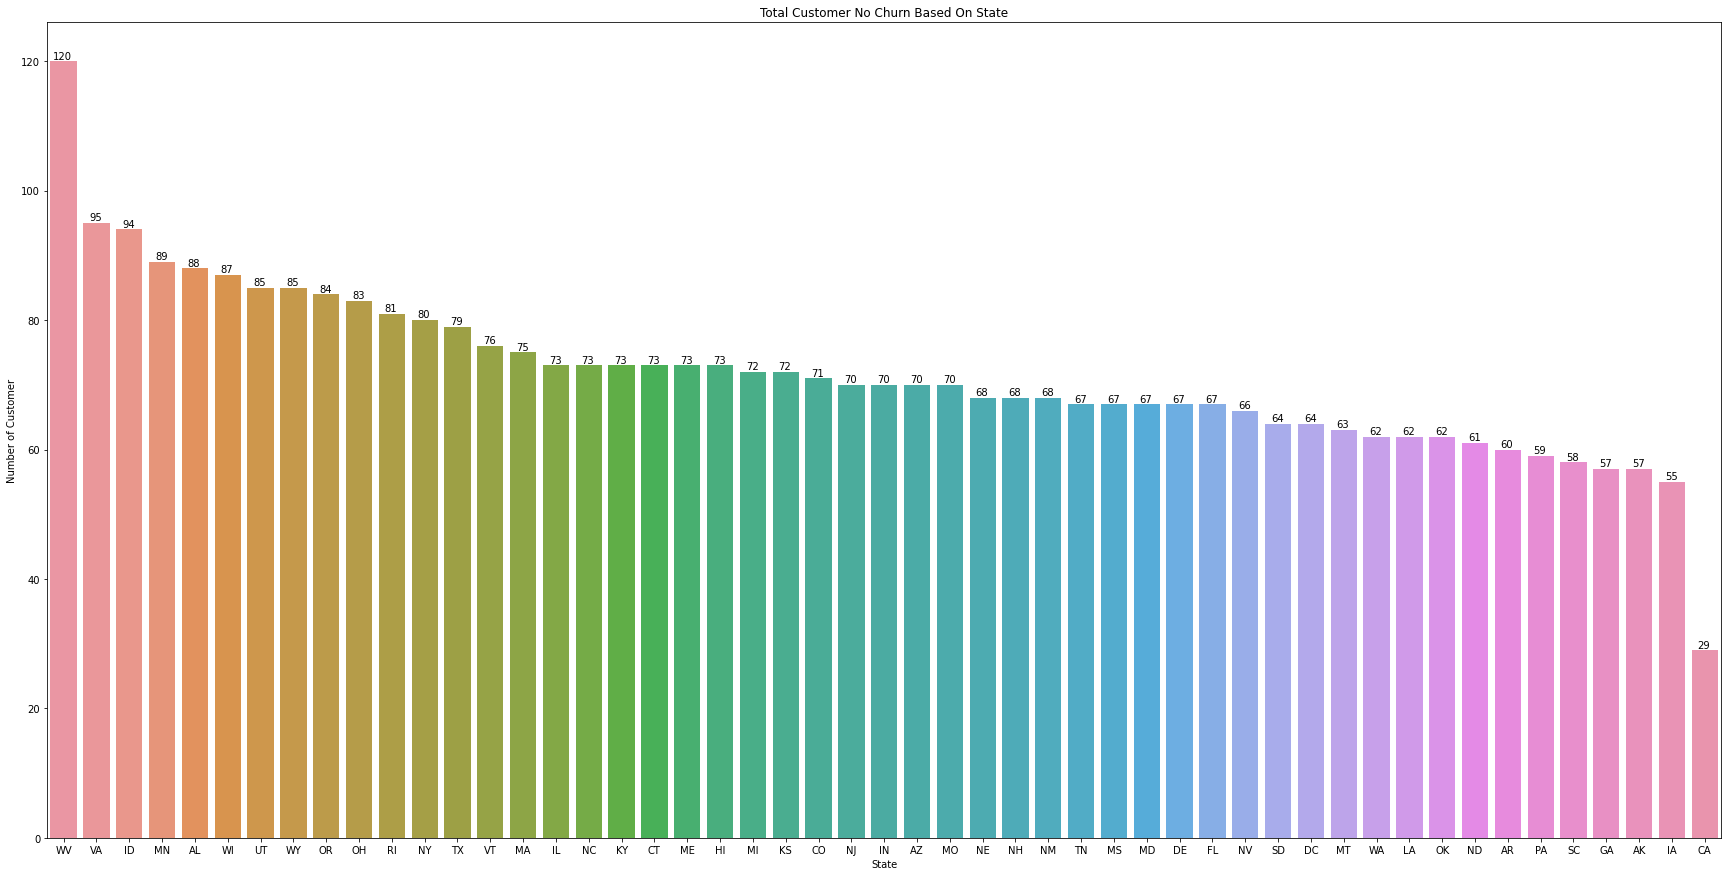

In [ ]:
#Count Plot
plt.figure(figsize=(30,15))
plt.title('Total Customer No Churn Based On State')
ax = sns.countplot(x='state', data= cust_no_churn, order = cust_no_churn['state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Customer')

for p, label in zip(ax.patches, cust_no_churn['state'].value_counts().values ):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.375), ha='center')

plt.show()

- Jumlah pelanggan yang masih berlangganan (no churn) terbanyak ada di negara bagian dengan kode WV dengan total **120** orang.
- Jumlah pelanggan yang masih berlangganan (no churn) tersedikit ada di negara bagian dengan kode CA dengan total masing-masing **29** orang.

In [ ]:
churn_rate_df = pd.DataFrame((cust_churn['state'].value_counts()/df_train['state'].value_counts()))
no_churn_rate_df = pd.DataFrame((cust_no_churn['state'].value_counts()/df_train['state'].value_counts()))

In [ ]:
churn_rate_df.reset_index(inplace=True)
churn_rate_df = churn_rate_df.rename(columns = {'index':'state', 'state':'churn_rate'})

In [ ]:
no_churn_rate_df.reset_index(inplace=True)
no_churn_rate_df = no_churn_rate_df.rename(columns = {'index':'state', 'state':'no_churn_rate'})

In [ ]:
churn_rate_df = churn_rate_df.sort_values(by='churn_rate', ascending=False)
no_churn_rate_df = no_churn_rate_df.sort_values(by='no_churn_rate', ascending=False)

In [ ]:
churn_rate_df

,state,churn_rate
31,NJ,0.270833
4,CA,0.256410
47,WA,0.225000
20,MD,0.220930
26,MT,0.212500
36,OK,0.205128
33,NV,0.204819
40,SC,0.194444
43,TX,0.193878
25,MS,0.182927


In [ ]:
no_churn_rate_df 

,state,no_churn_rate
45,VA,0.950000
11,HI,0.948052
0,AK,0.934426
29,NE,0.931507
39,RI,0.931034
48,WI,0.925532
14,IL,0.924051
27,NC,0.912500
28,ND,0.910448
3,AZ,0.909091


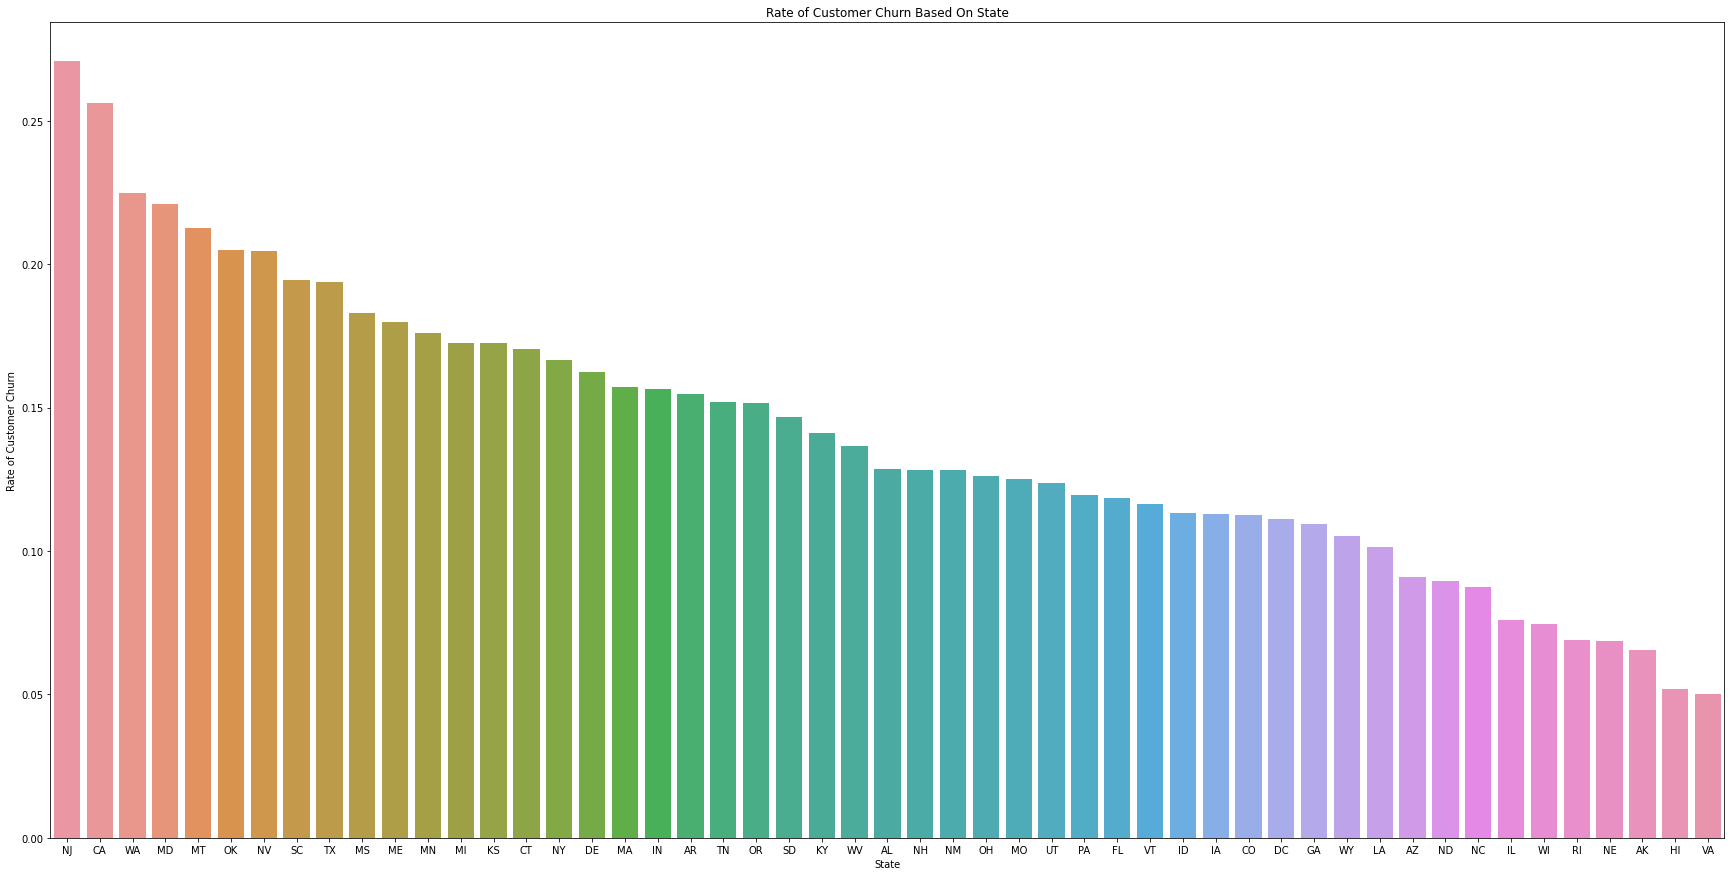

In [ ]:
#Count Plot
plt.figure(figsize=(30,15))
plt.title('Rate of Customer Churn Based On State')
sns.barplot(x = 'state', y='churn_rate', data=churn_rate_df)
plt.xlabel('State')
plt.ylabel('Rate of Customer Churn')
plt.show()

- Rate pelanggan yang sudah tidak berlangganan (churn) paling tinggi ada di negara bagian dengan kode NJ dengan rate **0.27**.
- Rate pelanggan yang sudah tidak berlangganan (churn) paling rendah ada di negara bagian dengan kode VA dengan rate **0.05**.

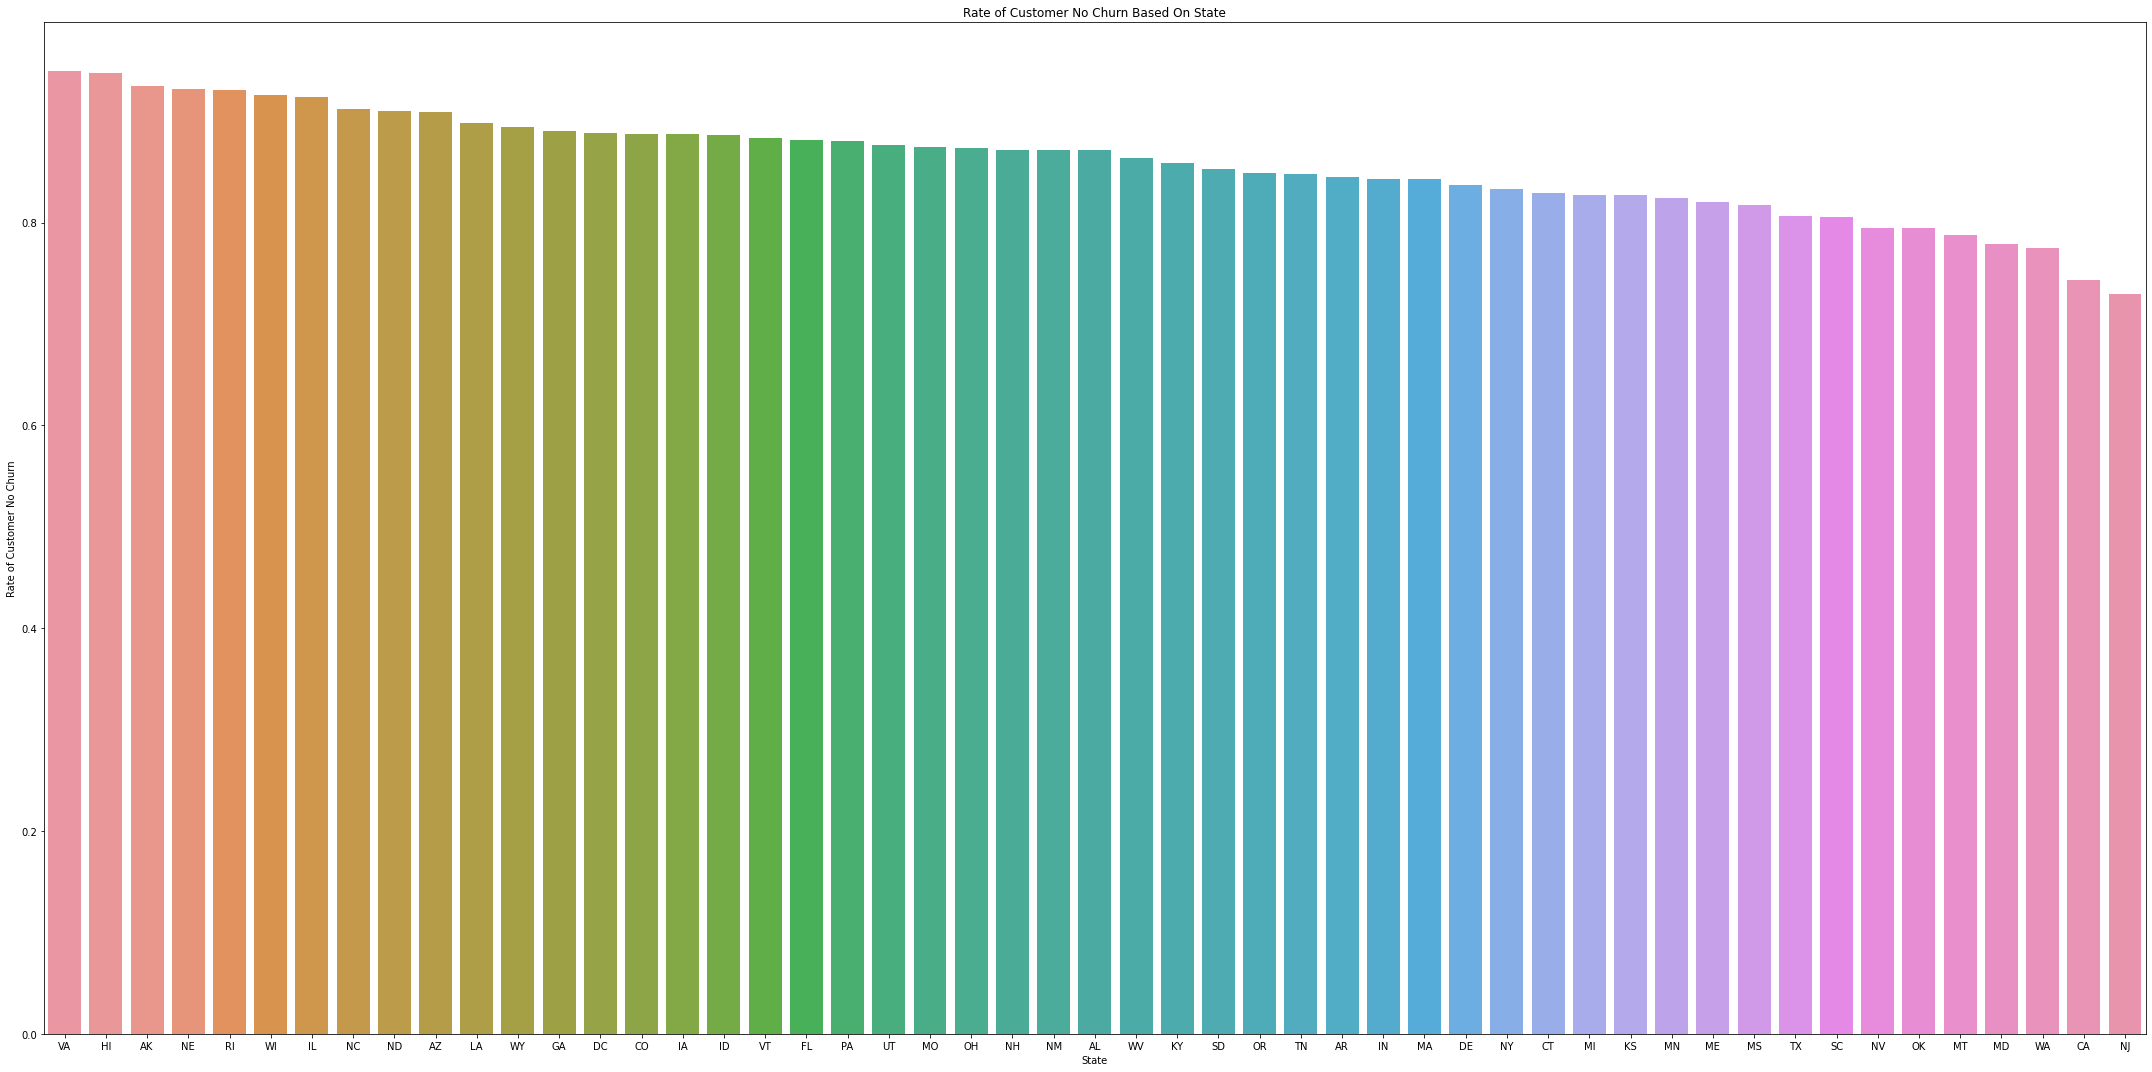

In [ ]:
#Count Plot
plt.figure(figsize=(30,15))
plt.title('Rate of Customer No Churn Based On State')
sns.barplot(x = 'state', y='no_churn_rate', data=no_churn_rate_df)
plt.xlabel('State')
plt.ylabel('Rate of Customer No Churn')
plt.tight_layout()
plt.show()

- Rate pelanggan yang masih berlangganan (no churn) paling tinggi ada di negara bagian dengan kode VA dengan rate **0.95**.
- Rate pelanggan yang masih berlangganan (no churn) paling rendah ada di negara bagian dengan kode NJ dengan rate **0.72**.

**Visualisasi Awal Kolom Area Code: Ada berapa pelanggan yang masih berlangganan (no churn) dan berhenti berlangganan (churn) berdasarkan area code?**

---



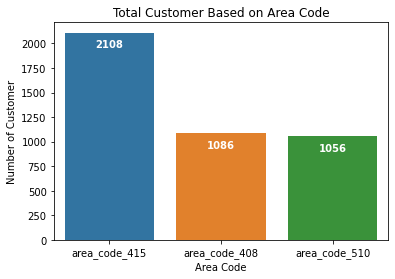

In [ ]:
#Count Plot
plt.figure()
plt.title('Total Customer Based on Area Code')
ax = sns.countplot(x='area_code', data= df_train, order=df_train['area_code'].value_counts(ascending=False).index)
plt.xlabel('Area Code')
plt.ylabel('Number of Customer')

for p, label in zip(ax.patches, df_train['area_code'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.4, p.get_height()-150), weight='bold', color='white', ha='center')

plt.show()

- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) tertinggi ada di area_code_415 dengan total **2108** orang.
- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) terendah ada di area_code_510 dengan total **1056** orang.

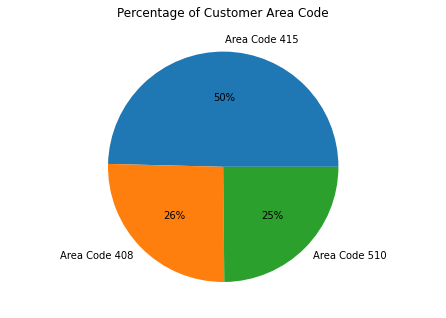

In [ ]:
#Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Area Code 415','Area Code 408','Area Code 510']
churn = df_train.area_code.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Customer Area Code')
plt.show()

**Visualisasi Awal Kolom International Plan: Ada berapa pelanggan yang masih berlangganan (no churn) dan berhenti berlangganan (churn) berdasarkan international plan?**

---



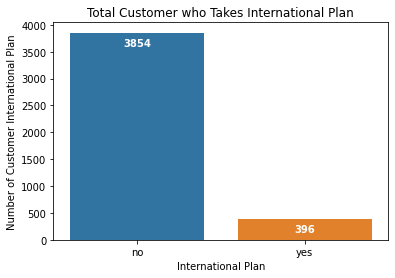

In [ ]:
#Count Plot
plt.figure()
plt.title('Total Customer who Takes International Plan')
ax = sns.countplot(x='international_plan', data= df_train, order=df_train['international_plan'].value_counts(ascending=False).index)
plt.xlabel('International Plan')
plt.ylabel('Number of Customer International Plan')

for p, label in zip(ax.patches, df_train['international_plan'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.4, p.get_height()-250), weight='bold', color='white', ha='center')

plt.show()

- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) yang mengambil international plan ada **396** orang.
- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) yang tidak mengambil international plan ada **3854** orang.

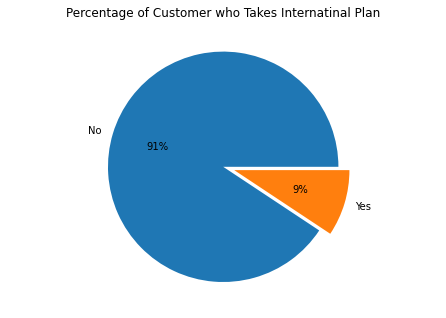

In [ ]:
#Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_train.international_plan.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%', explode=[0,0.1])
plt.title('Percentage of Customer who Takes Internatinal Plan')
plt.show()

**Visualisasi Awal Kolom Voice Mail Plan: Ada berapa pelanggan yang masih berlangganan (no churn) dan berhenti berlangganan (churn) berdasarkan voice mail plan?**

---



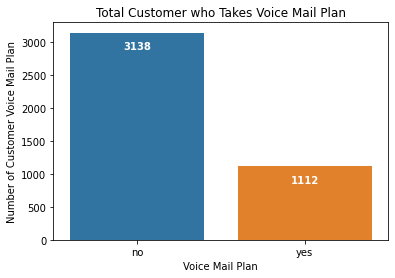

In [ ]:
#Count Plot
plt.figure()
plt.title('Total Customer who Takes Voice Mail Plan')
ax = sns.countplot(x='voice_mail_plan', data= df_train, order=df_train['voice_mail_plan'].value_counts(ascending=False).index)
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customer Voice Mail Plan')

for p, label in zip(ax.patches, df_train['voice_mail_plan'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.4, p.get_height()-250), weight='bold', color='white', ha='center')

plt.show()

- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) yang mengambil voice mail plan ada **1112** orang.
- Jumlah pelanggan total mula-mula (masih berlangganan dan sudah tidak berlangganan) yang tidak mengambil voice mail plan ada **3138** orang.

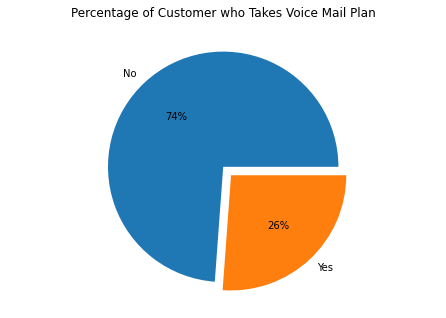

In [ ]:
#Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_train.voice_mail_plan.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%', explode=[0,0.1])
plt.title('Percentage of Customer who Takes Voice Mail Plan')
plt.show()

**Visualisasi Awal Kolom Churn: Ada berapa pelanggan yang masih berlangganan (no churn) dan berhenti berlangganan (churn)?**

---



In [ ]:
churn_rate = cust_churn['churn'].count()/df_train['churn'].count()
no_churn_rate = cust_no_churn['churn'].count()/df_train['churn'].count()

print('Customer Churn Rate: %.3f%%' % (churn_rate*100.0))
print('Customer No Churn Rate: %.3f%%' % (no_churn_rate*100.0))

Customer Churn Rate: 14.071%
Customer No Churn Rate: 85.929%


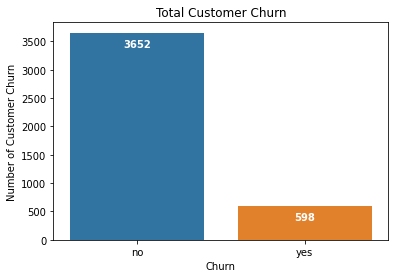

In [ ]:
#Count Plot
plt.figure()
plt.title('Total Customer Churn')
ax = sns.countplot(x='churn', data= df_train, order=df_train['churn'].value_counts(ascending=False).index)
plt.xlabel('Churn')
plt.ylabel('Number of Customer Churn')

for p, label in zip(ax.patches, df_train['churn'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.4, p.get_height()-250), weight='bold', color='white', ha='center')

plt.show()

- Jumlah pelanggan yang sudah tidak berlangganan (churn) ada **598** orang.
- Jumlah pelanggan yang masih berlangganan (no churn) ada **3652** orang.

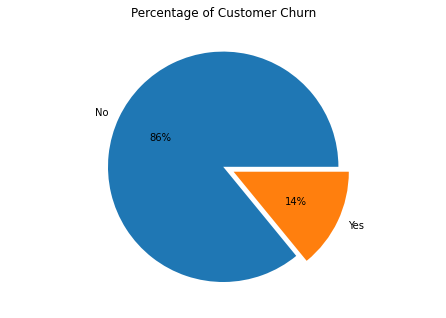

In [ ]:
#Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_train.churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%', explode=[0,0.1])
plt.title('Percentage of Customer Churn')
plt.show()

- Persentase customer churn adalah **14%** dan customer no churn **86%**



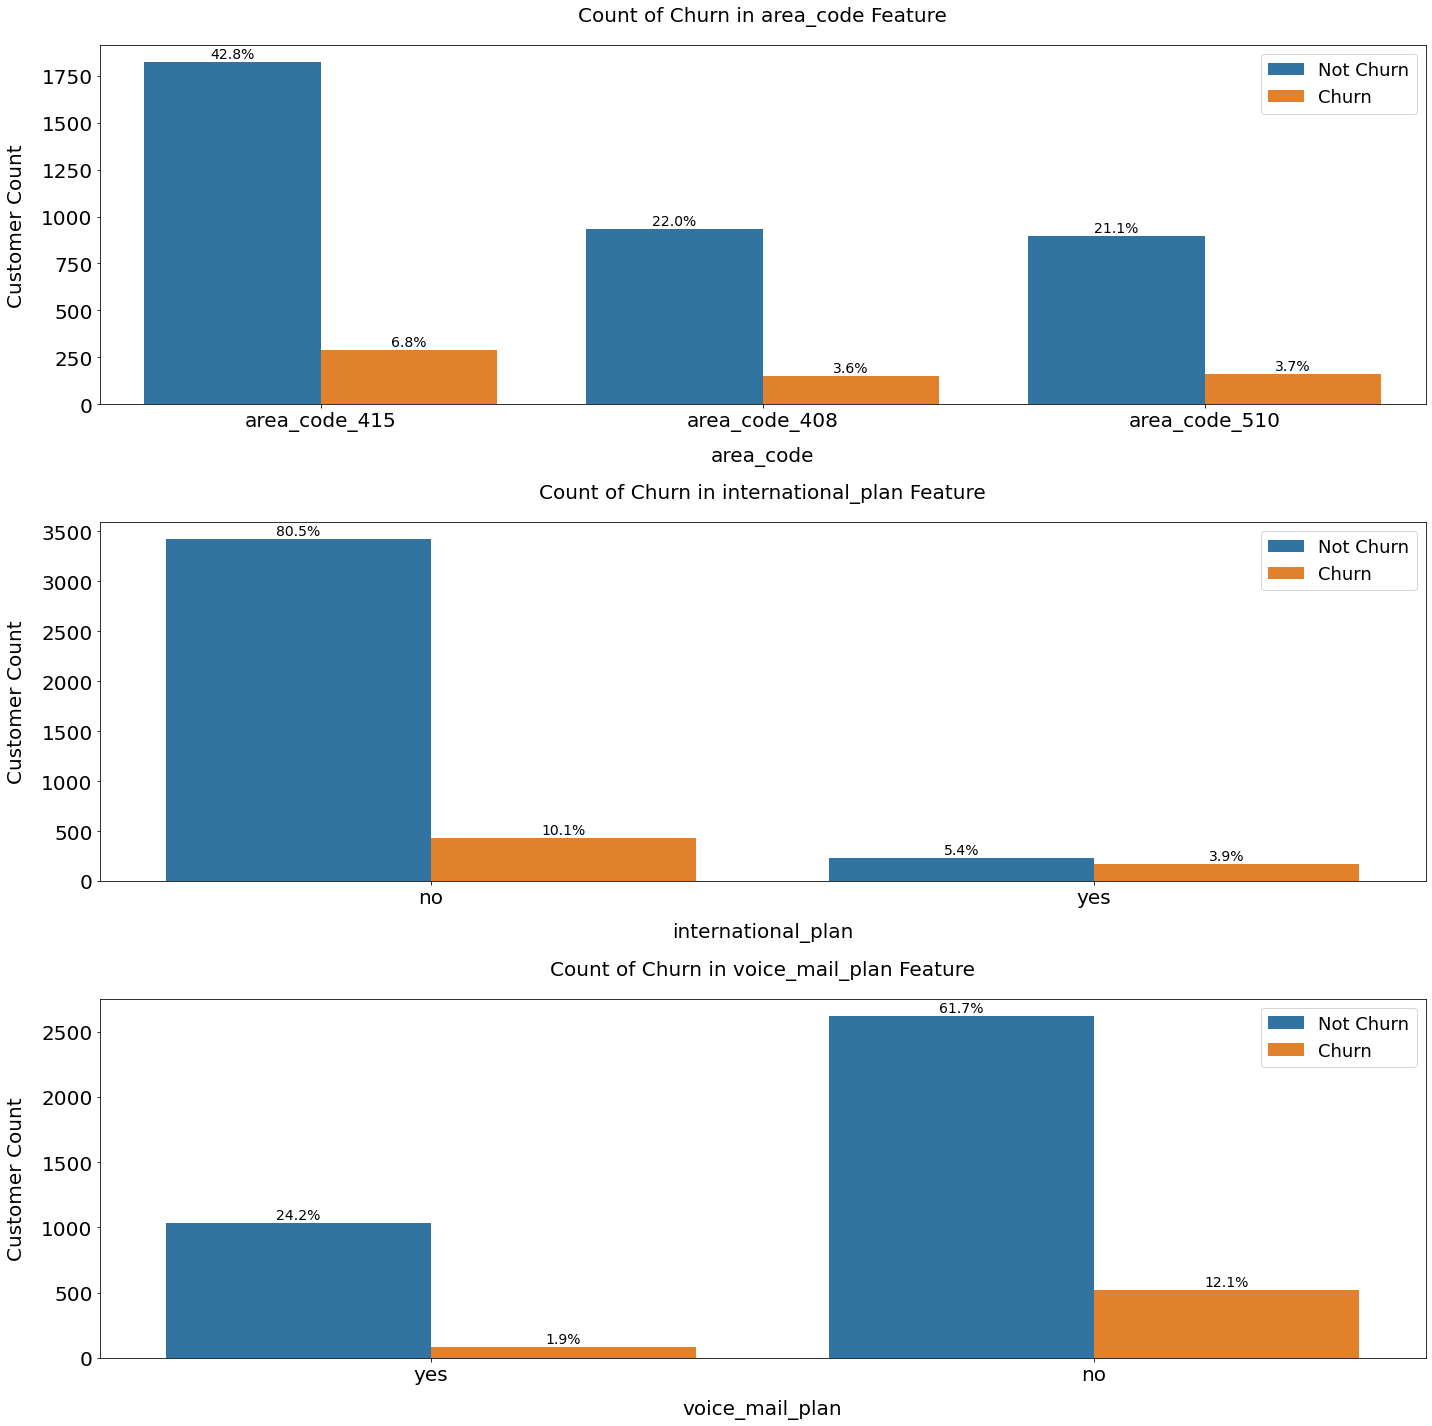

In [ ]:
#Countplot : untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
cols = ['area_code', 'international_plan', 'voice_mail_plan']

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='center', xytext=(0, 8), textcoords='offset points', fontsize=14)

for i, feature in enumerate(cols, 1):
    plt.subplot(3, 1, i)
    ax = sns.countplot(x=feature, hue='churn', data=df_train)
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Customer Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    total = len(df_train[cols])
    with_per(total, ax)
    plt.legend(['Not Churn', 'Churn'], loc='upper right', prop={'size': 18})
    plt.title('Count of Churn in {} Feature'.format(feature), size=20, y=1.05)
plt.tight_layout()
plt.show()

- Semakin banyak pelanggan di suatu area semakin meningkat pula customer churnnya
- Pelanggan yang mengambil international plan cenderung mengalami churn daripada pelanggan yang tidak mengambil international plan

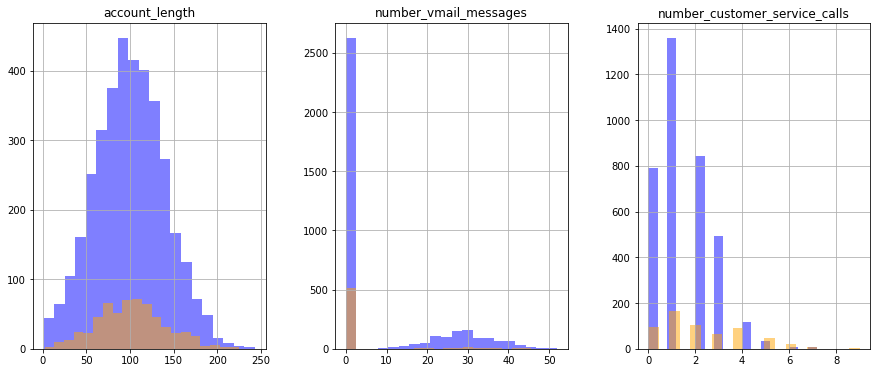

In [ ]:
#Subplots : membuat gambar dan satu set subplot
numerical_features = ['account_length','number_vmail_messages','number_customer_service_calls']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

df_train[df_train.churn == 'no'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_train[df_train.churn == 'yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

plt.show()

- Distribusi customer churn paling banyak terjadi di antara panjang akun 50-150

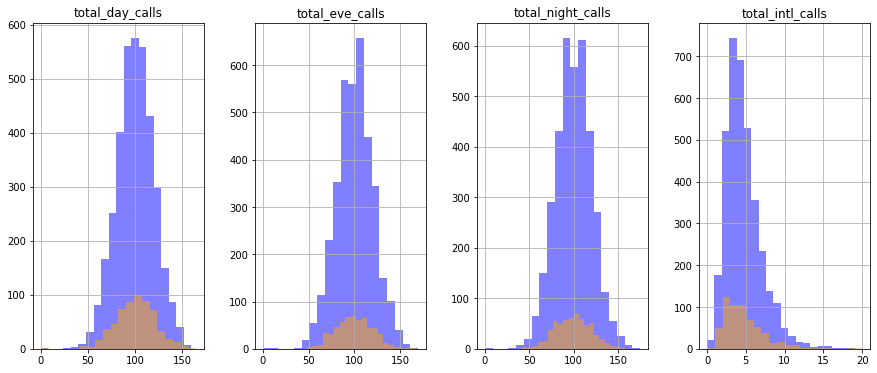

In [ ]:
#Subplots : membuat gambar dan satu set subplot
numerical_features = ['total_day_calls','total_eve_calls','total_night_calls','total_intl_calls']
fig, ax = plt.subplots(1, 4, figsize=(15, 6))

df_train[df_train.churn == 'no'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_train[df_train.churn == 'yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

plt.show()

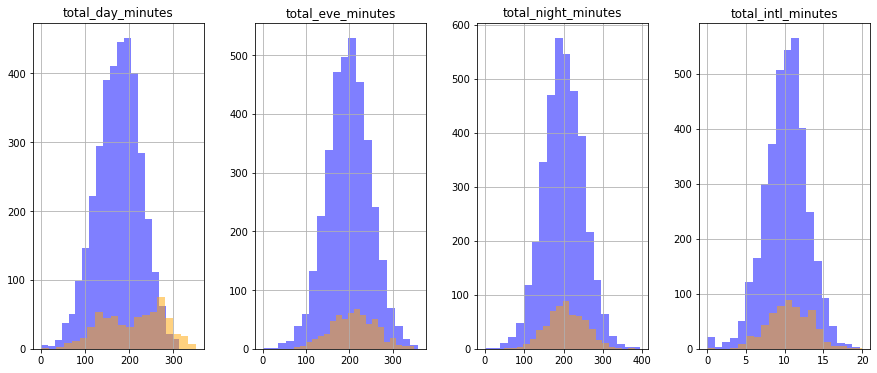

In [ ]:
#Subplots : membuat gambar dan satu set subplot
numerical_features = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']
fig, ax = plt.subplots(1, 4, figsize=(15, 6))

df_train[df_train.churn == 'no'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_train[df_train.churn == 'yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

plt.show()

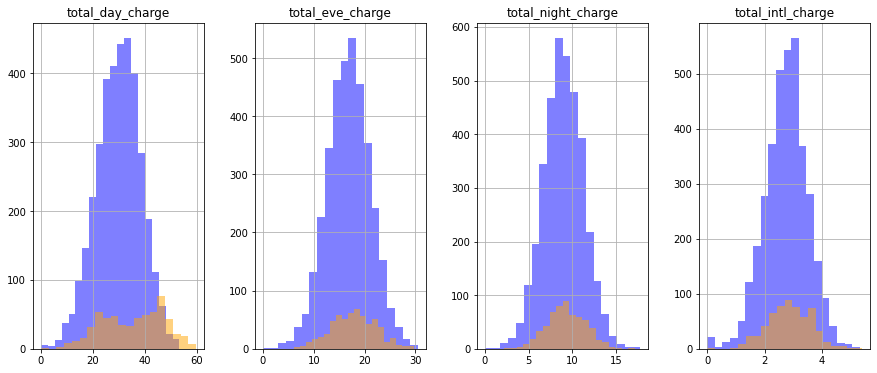

In [ ]:
#Subplots : membuat gambar dan satu set subplot
numerical_features = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
fig, ax = plt.subplots(1, 4, figsize=(15, 6))

df_train[df_train.churn == 'no'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_train[df_train.churn == 'yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

plt.show()

<Figure size 432x288 with 0 Axes>

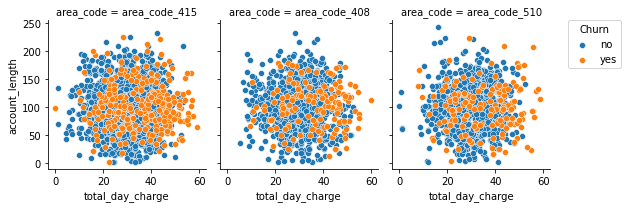

<Figure size 432x288 with 0 Axes>

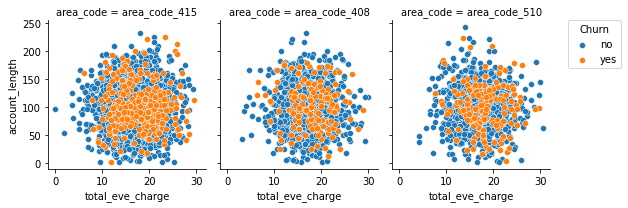

<Figure size 432x288 with 0 Axes>

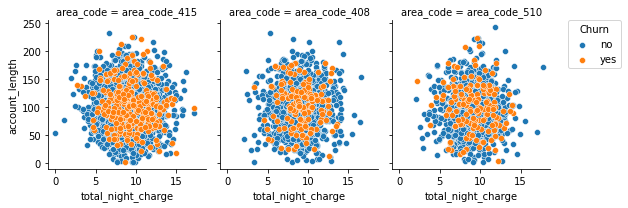

<Figure size 432x288 with 0 Axes>

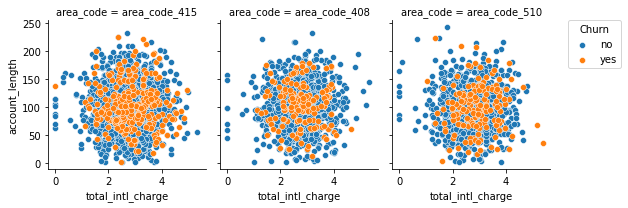

In [ ]:
plt.figure()
sns.FacetGrid(df_train, col = 'area_code', hue = 'churn').map(sns.scatterplot, 'total_day_charge', 'account_length')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right', title='Churn', borderaxespad=0)
plt.tight_layout()
plt.show()

plt.figure()
sns.FacetGrid(df_train, col = 'area_code', hue = 'churn').map(sns.scatterplot, 'total_eve_charge', 'account_length')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right', title='Churn', borderaxespad=0)
plt.tight_layout()
plt.show()

plt.figure()
sns.FacetGrid(df_train, col = 'area_code', hue = 'churn').map(sns.scatterplot, 'total_night_charge', 'account_length')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right', title='Churn', borderaxespad=0)
plt.tight_layout()
plt.show()

plt.figure()
sns.FacetGrid(df_train, col = 'area_code', hue = 'churn').map(sns.scatterplot, 'total_intl_charge', 'account_length')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right', title='Churn', borderaxespad=0)
plt.tight_layout()
plt.show()

### **Mencari Korelasi Awal**

---

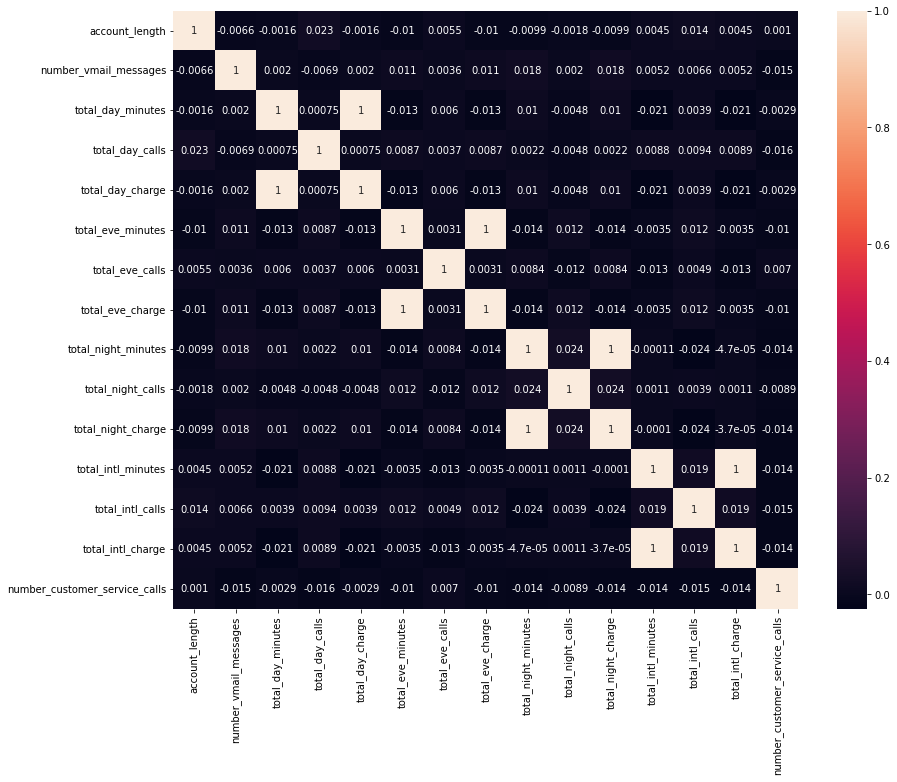

In [ ]:
#Memperoleh nilai korelasi dari semua kolom numerikal dari dataset train
plt.figure(figsize=(14,11))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
corr_matrix = df_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr_train = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

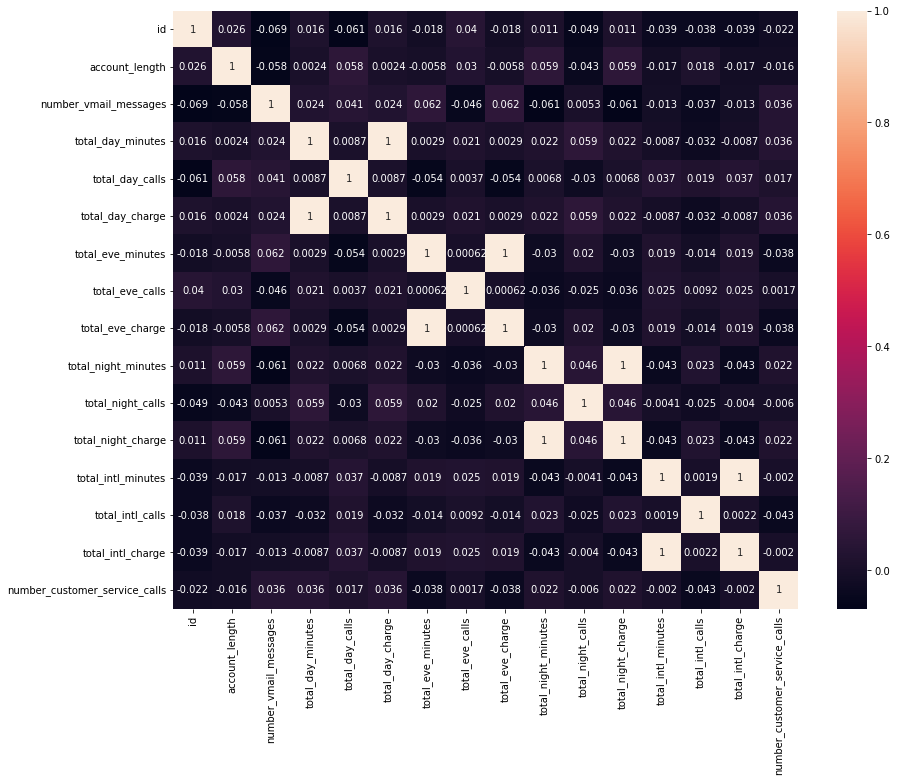

In [ ]:
#Memperoleh nilai korelasi dari semua kolom numerikal dari dataset test
plt.figure(figsize=(14,11))
sns.heatmap(df_test.corr(),annot=True)
plt.show()

In [ ]:
corr_matrix = df_test.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr_test = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

## **Data Preprocessing**

---



### **Menentukan kolom target**

---


In [ ]:
df_train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [ ]:
df_train['churn'].value_counts(normalize=True)*100

no     85.929412
yes    14.070588
Name: churn, dtype: float64

In [ ]:
df_train['churn'] = df_train['churn'].astype('category')
df_train['churn'] = df_train['churn'].cat.codes

Dari situ, dapat dilihat bahwa jumlah churn (yes) lebih sedikit daripada jumlah no churn (no), sehingga dapat dikatakan bahwa dataset yang digunakan imbalance, karena tidak memiliki proporsi yang seimbang.

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


### **Menghapus kolom yang tidak berguna**

---


Menghapus kolom yang mengandung id unik (primary key) yaitu id.

In [ ]:
df_test = df_test.drop('id', axis=1)

In [ ]:
df_train.drop(to_drop_hicorr_train, axis=1, inplace=True)

In [ ]:
df_test.drop(to_drop_hicorr_test, axis=1, inplace=True)

### **Handle Inconsistencies**

---



In [ ]:
df_train['area_code'] = df_train['area_code'].str.replace("_"," ")
df_test['area_code'] = df_test['area_code'].str.replace("_"," ")

### **Data Cleaning : Handle Outliers**

---



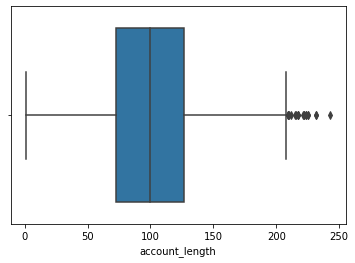

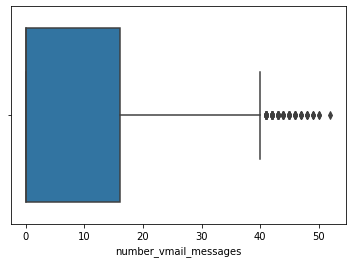

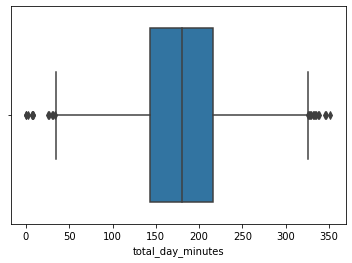

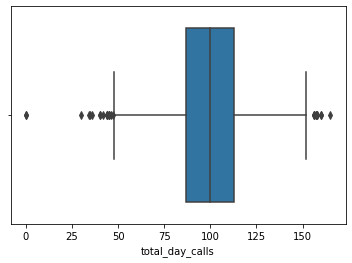

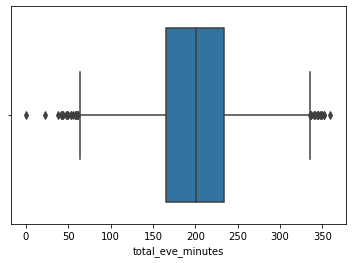

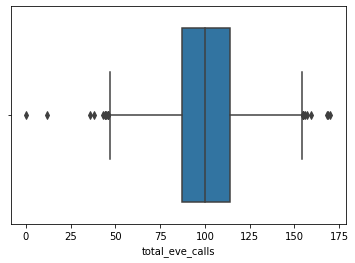

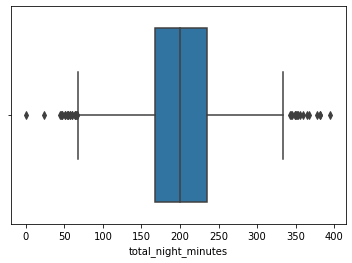

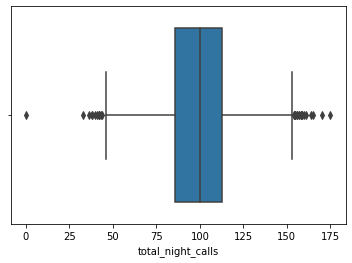

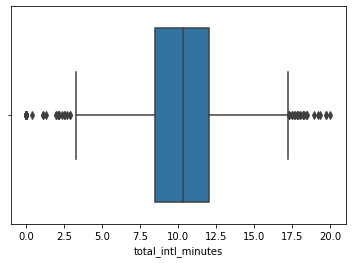

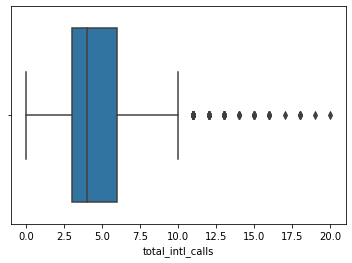

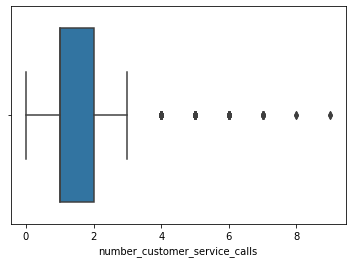

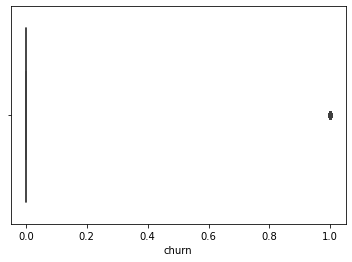

In [ ]:
#Check Outliers Dataset Train
num_train = df_train.select_dtypes(include='number').columns
for column in num_train:
  plt.figure()
  sns.boxplot(x=df_train[column])
  plt.show()

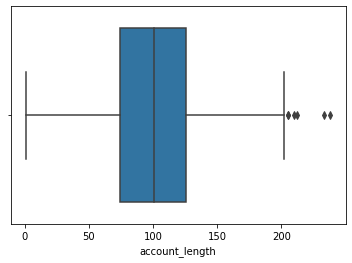

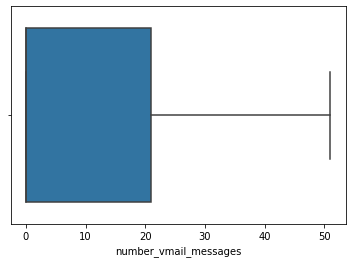

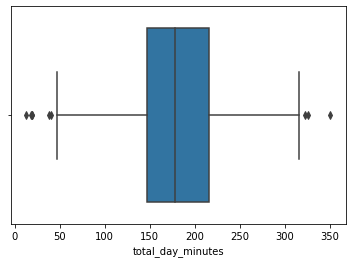

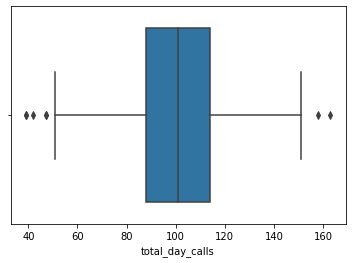

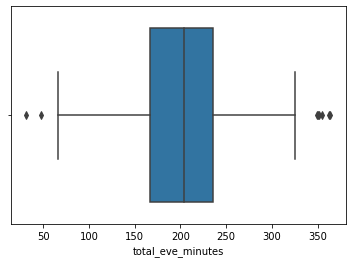

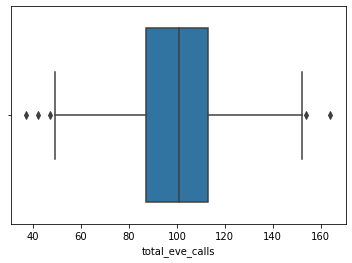

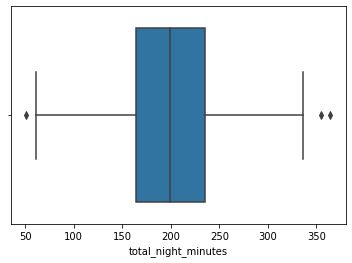

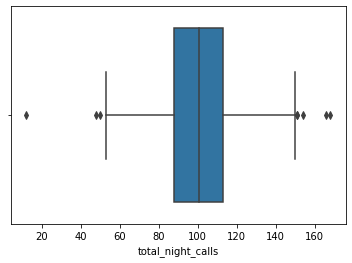

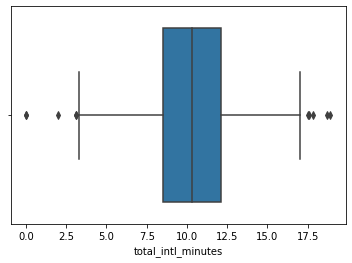

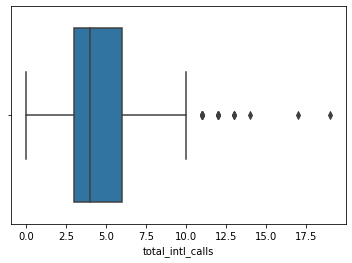

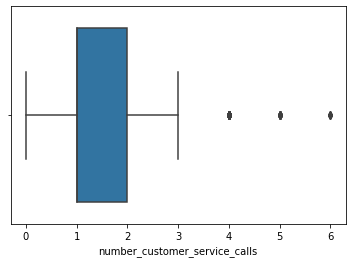

In [ ]:
#Check Outliers Dataset Test
num_test = df_test.select_dtypes(include='number').columns
for column in num_test:
  plt.figure()
  sns.boxplot(x=df_test[column])
  plt.show()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')
filtered_entries = np.array([True] * len(df_train))
outliers_columns = ['account_length','number_vmail_messages','number_customer_service_calls','total_day_calls','total_eve_calls','total_night_calls','total_intl_calls']

for column in outliers_columns:
  Q1 = df_train[column].quantile(0.25)
  Q3 = df_train[column].quantile(0.75)
  IQR = Q3 - Q1
  maximum_value = Q3 + 1.5*IQR
  minimum_value = Q1 - 1.5*IQR
  filtered_entries = ((df_train[column] >= minimum_value) & (df_train[column] <= maximum_value)) & filtered_entries

df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3655


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_test)}')
filtered_entries = np.array([True] * len(df_test))
outliers_columns = ['account_length','number_customer_service_calls','total_day_calls','total_eve_calls','total_night_calls','total_intl_calls']

for column in outliers_columns:
  Q1 = df_test[column].quantile(0.25)
  Q3 = df_test[column].quantile(0.75)
  IQR = Q3 - Q1
  maximum_value = Q3 + 1.5*IQR
  minimum_value = Q1 - 1.5*IQR
  filtered_entries = ((df_test[column] >= minimum_value) & (df_test[column] <= maximum_value)) & filtered_entries

df_test = df_test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_test)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 646


In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
count,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000
mean,99.696306,6.867031,180.299371,99.896033,200.252449,100.070588,201.055759,99.993434,10.260684,4.235841,1.299316,0.107798
std,39.097400,12.485277,53.913165,19.335432,50.453503,19.440588,50.517478,19.428097,2.779728,2.093380,0.974574,0.310167
min,1.000000,0.000000,6.600000,48.000000,22.300000,47.000000,23.200000,46.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.600000,87.000000,166.300000,87.000000,167.300000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,99.000000,0.000000,180.400000,100.000000,200.700000,100.000000,201.300000,100.000000,10.400000,4.000000,1.000000,0.000000
75%,127.000000,0.000000,216.550000,113.000000,233.700000,113.000000,235.400000,113.000000,12.100000,5.000000,2.000000,0.000000
max,208.000000,40.000000,351.500000,152.000000,359.300000,154.000000,395.000000,153.000000,19.700000,10.000000,3.000000,1.000000


In [ ]:
df_test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,99.670279,8.595975,180.678328,100.806502,203.275851,100.981424,198.720743,100.060372,10.320898,4.315789,1.374613
std,39.020185,14.283267,53.207787,18.952606,52.057690,18.640532,51.198279,17.999339,2.758364,2.050365,0.976740
min,1.000000,0.000000,12.500000,51.000000,31.200000,50.000000,61.400000,53.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,146.625000,88.000000,167.200000,88.000000,163.550000,88.000000,8.700000,3.000000,1.000000
50%,101.000000,0.000000,178.800000,101.000000,202.600000,101.000000,197.400000,100.000000,10.400000,4.000000,1.000000
75%,125.750000,21.000000,215.975000,114.000000,236.100000,113.000000,233.500000,112.000000,12.100000,5.750000,2.000000
max,202.000000,51.000000,350.800000,151.000000,361.800000,152.000000,364.300000,150.000000,18.900000,10.000000,3.000000


### **Data Transformation**

---

In [ ]:
def concat_df(data_train, data_test):
    return pd.concat([data_train, data_test], sort=True).reset_index(drop=True)

df_all = concat_df(df_train, df_test)
df_all.name = 'All Set'
dfs = [df_train, df_test]
df_all

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_minutes,total_eve_calls,total_eve_minutes,total_intl_calls,total_intl_minutes,total_night_calls,total_night_minutes,voice_mail_plan
0,107,area code 415,0.0,no,1,26,OH,123,161.6,103,195.5,3,13.7,103,254.4,yes
1,137,area code 415,0.0,no,0,0,NJ,114,243.4,110,121.2,5,12.2,104,162.6,no
2,84,area code 408,0.0,yes,2,0,OH,71,299.4,88,61.9,7,6.6,89,196.9,no
3,75,area code 415,0.0,yes,3,0,OK,113,166.7,122,148.3,3,10.1,121,186.9,no
4,121,area code 510,0.0,no,3,24,MA,88,218.2,108,348.5,7,7.5,118,212.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,130,area code 415,NaN,no,0,0,GA,99,119.4,97,226.3,7,11.3,111,202.7,no
4297,73,area code 408,NaN,no,3,0,WA,118,177.2,84,270.5,2,12.3,112,241.8,no
4298,152,area code 415,NaN,no,3,0,WV,90,184.2,73,256.8,2,14.7,113,213.6,no
4299,61,area code 415,NaN,no,1,0,DC,89,140.6,128,172.8,4,13.6,97,212.4,no


In [ ]:
print(df_train.columns)
print(df_test.columns)
print(df_train.shape)
print(df_test.shape)
print(df_all.shape)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls', 'churn'],
      dtype='object')
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')
(3655, 16)
(646, 15)
(4301, 16)


In [ ]:
df_train = df_all.loc[:3654]
df_test = df_all.loc[3655:]
dfs = [df_train, df_test]

In [ ]:
print(df_train.columns)
print(df_test.columns)
print(df_train.shape)
print(df_test.shape)
print(df_all.shape)

Index(['account_length', 'area_code', 'churn', 'international_plan',
       'number_customer_service_calls', 'number_vmail_messages', 'state',
       'total_day_calls', 'total_day_minutes', 'total_eve_calls',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_minutes',
       'total_night_calls', 'total_night_minutes', 'voice_mail_plan'],
      dtype='object')
Index(['account_length', 'area_code', 'churn', 'international_plan',
       'number_customer_service_calls', 'number_vmail_messages', 'state',
       'total_day_calls', 'total_day_minutes', 'total_eve_calls',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_minutes',
       'total_night_calls', 'total_night_minutes', 'voice_mail_plan'],
      dtype='object')
(3655, 16)
(646, 16)
(4301, 16)


### **Normalization and Standardization**

---



In [ ]:
num_cols = num_train
for df in dfs:
    for feature in num_cols:        
        df[feature] = MinMaxScaler().fit_transform(df[feature].values.reshape(len(df), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
cat_cols = ['state','area_code','international_plan','voice_mail_plan']

for df in dfs:
    for feature in cat_cols:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
cat_features = ['international_plan', 'voice_mail_plan']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:2]], axis=1)
df_test = pd.concat([df_test, *encoded_features[2:]], axis=1)

In [ ]:
df_train.head()

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_minutes,total_eve_calls,total_eve_minutes,total_intl_calls,total_intl_minutes,total_night_calls,total_night_minutes,voice_mail_plan,international_plan_1,international_plan_2,voice_mail_plan_1,voice_mail_plan_2
0,0.512077,1,0.0,0,0.333333,0.65,35,0.721154,0.449406,0.523364,0.513947,0.3,0.695431,0.532710,0.621840,1,1.0,0.0,0.0,1.0
1,0.657005,1,0.0,0,0.000000,0.00,31,0.634615,0.686576,0.588785,0.293472,0.5,0.619289,0.542056,0.374933,0,1.0,0.0,1.0,0.0
2,0.400966,0,0.0,1,0.666667,0.00,35,0.221154,0.848942,0.383178,0.117507,0.7,0.335025,0.401869,0.467187,0,0.0,1.0,1.0,0.0
3,0.357488,1,0.0,1,1.000000,0.00,36,0.625000,0.464193,0.700935,0.373887,0.3,0.512690,0.700935,0.440290,0,0.0,1.0,1.0,0.0
4,0.579710,2,0.0,0,1.000000,0.60,19,0.384615,0.613511,0.570093,0.967953,0.7,0.380711,0.672897,0.509414,1,1.0,0.0,0.0,1.0


In [ ]:
df_test.head()

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_minutes,total_eve_calls,total_eve_minutes,total_intl_calls,total_intl_minutes,total_night_calls,total_night_minutes,voice_mail_plan,international_plan_1,international_plan_2,voice_mail_plan_1,voice_mail_plan_2
3655,0.631841,1,NaN,0,0.333333,0.490196,16,0.59,0.746675,0.480392,0.502722,0.3,0.529101,0.391753,0.605150,1,1.0,0.0,0.0,1.0
3656,0.582090,2,NaN,1,0.000000,0.000000,1,0.47,0.623411,0.500000,0.572898,0.6,0.333333,0.670103,0.470452,0,0.0,1.0,1.0,0.0
3657,0.457711,2,NaN,0,1.000000,0.000000,46,0.63,0.526751,0.598039,0.565638,0.3,0.428571,0.701031,0.225157,0,1.0,0.0,1.0,0.0
3658,0.860697,1,NaN,0,1.000000,0.000000,29,0.25,0.330476,0.607843,0.743799,0.5,0.820106,0.639175,0.624959,0,1.0,0.0,1.0,0.0
3659,0.701493,1,NaN,0,0.666667,0.000000,14,0.44,0.213716,0.127451,0.319117,0.6,0.751323,0.979381,0.624298,0,1.0,0.0,1.0,0.0


In [ ]:
df_all = concat_df(df_train, df_test)
df_all.head()

,account_length,area_code,churn,international_plan,international_plan_1,international_plan_2,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_minutes,total_eve_calls,total_eve_minutes,total_intl_calls,total_intl_minutes,total_night_calls,total_night_minutes,voice_mail_plan,voice_mail_plan_1,voice_mail_plan_2
0,0.512077,1,0.0,0,1.0,0.0,0.333333,0.65,35,0.721154,0.449406,0.523364,0.513947,0.3,0.695431,0.532710,0.621840,1,0.0,1.0
1,0.657005,1,0.0,0,1.0,0.0,0.000000,0.00,31,0.634615,0.686576,0.588785,0.293472,0.5,0.619289,0.542056,0.374933,0,1.0,0.0
2,0.400966,0,0.0,1,0.0,1.0,0.666667,0.00,35,0.221154,0.848942,0.383178,0.117507,0.7,0.335025,0.401869,0.467187,0,1.0,0.0
3,0.357488,1,0.0,1,0.0,1.0,1.000000,0.00,36,0.625000,0.464193,0.700935,0.373887,0.3,0.512690,0.700935,0.440290,0,1.0,0.0
4,0.579710,2,0.0,0,1.0,0.0,1.000000,0.60,19,0.384615,0.613511,0.570093,0.967953,0.7,0.380711,0.672897,0.509414,1,0.0,1.0


In [ ]:
drop_cols = ['international_plan','voice_mail_plan']
df_all.drop(columns=drop_cols, inplace=True)
drop_cols2 = ['international_plan','voice_mail_plan','churn']

In [ ]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols2))
y_train = df_train['churn'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols2))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape[0]))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (3655, 17)
y_train shape: 3655
X_test shape: (646, 17)


## **Modeling and Evaluation**

---



### **Feature Selection**

---



In [ ]:
df_model = df_train.drop(columns=drop_cols)

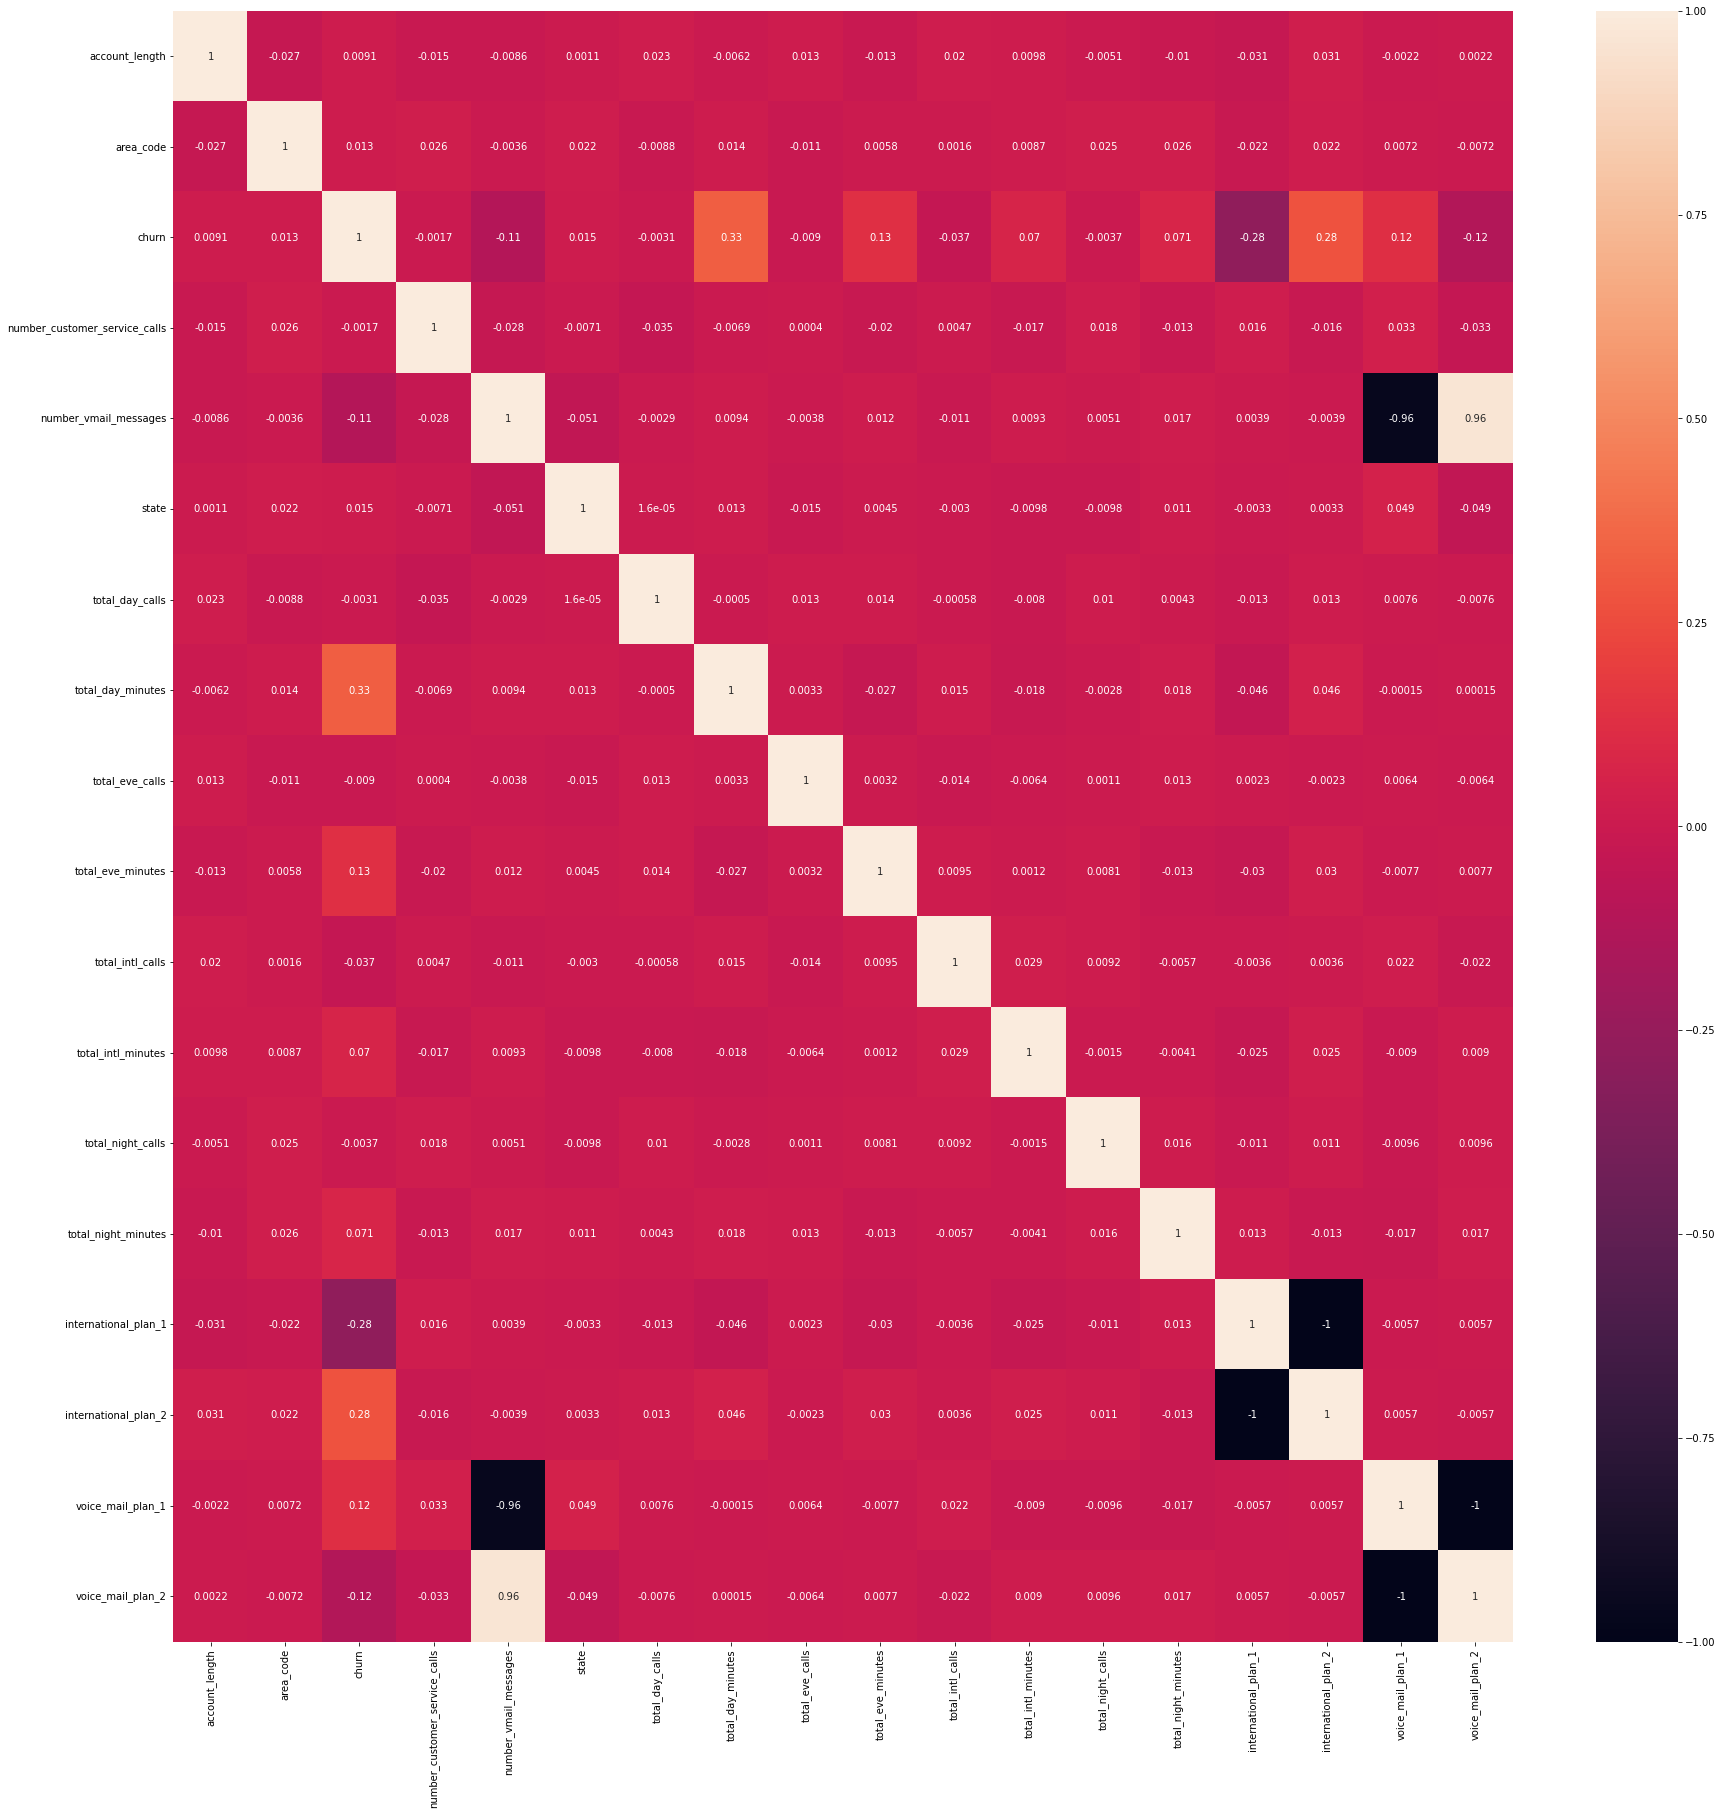

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df_model.corr(), annot=True)
plt.show()

In [ ]:
corr_matrix = df_model.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['international_plan_2', 'voice_mail_plan_1', 'voice_mail_plan_2']

In [ ]:
#Membuang kolom yang memiliki korelasi tinggi dengan kolom lainnya (buang yang lain, pertahankan 1)
df_model.drop(to_drop_hicorr, axis=1, inplace=True)

In [ ]:
df_model.head()

,account_length,area_code,churn,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_minutes,total_eve_calls,total_eve_minutes,total_intl_calls,total_intl_minutes,total_night_calls,total_night_minutes,international_plan_1
0,0.512077,1,0.0,0.333333,0.65,35,0.721154,0.449406,0.523364,0.513947,0.3,0.695431,0.532710,0.621840,1.0
1,0.657005,1,0.0,0.000000,0.00,31,0.634615,0.686576,0.588785,0.293472,0.5,0.619289,0.542056,0.374933,1.0
2,0.400966,0,0.0,0.666667,0.00,35,0.221154,0.848942,0.383178,0.117507,0.7,0.335025,0.401869,0.467187,0.0
3,0.357488,1,0.0,1.000000,0.00,36,0.625000,0.464193,0.700935,0.373887,0.3,0.512690,0.700935,0.440290,0.0
4,0.579710,2,0.0,1.000000,0.60,19,0.384615,0.613511,0.570093,0.967953,0.7,0.380711,0.672897,0.509414,1.0


In [ ]:
df_model.shape

(3655, 15)

In [ ]:
X = df_model.drop('churn', axis=1)
y = df_model['churn']

### **Train Test Split**

---



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Menyimpan hasil splitting
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape)
print('Jumlah baris dan kolom dari y_train adalah:', y_train.shape[0])
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape)
print('Jumlah baris dan kolom dari y_test adalah:', y_test.shape[0])
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (2924, 14)
Jumlah baris dan kolom dari y_train adalah: 2924
Prosentase Churn di data Training adalah:
0.0    0.888509
1.0    0.111491
Name: churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (731, 14)
Jumlah baris dan kolom dari y_test adalah: 731
Prosentase Churn di data Testing adalah:
0.0    0.906977
1.0    0.093023
Name: churn, dtype: float64


### **Algoritma Klasifikasi : Stochastic Gradient Descent Classifier**

---



In [ ]:
#Train the model
sgd_model = SGDClassifier().fit(x_train, y_train)

#Predict
y_train_pred = sgd_model.predict(x_train)

#Print classification report 
print('Classification Report Training Model (Stochastic Gradient Descent Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nF1 Score Training (Stochastic Gradient Descent Classifier): %.3f' % (f1_score(y_train, y_train_pred)))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
print('\nROC AUC Score Training (Stochastic Gradient Descent Classifier): %.3f' % train_auc)
print('\n')

#Test the model
# Predict
y_test_pred = sgd_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Stochastic Gradient Descent Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nF1 Score Testing (Stochastic Gradient Descent Classifier): %.3f' % (f1_score(y_test, y_test_pred)))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print('\nROC AUC Score Training (Stochastic Gradient Descent Classifier): %.3f' % test_auc)

Classification Report Training Model (Stochastic Gradient Descent Classifier):
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2598
         1.0       0.66      0.08      0.15       326

    accuracy                           0.89      2924
   macro avg       0.78      0.54      0.55      2924
weighted avg       0.87      0.89      0.85      2924


F1 Score Training (Stochastic Gradient Descent Classifier): 0.147

ROC AUC Score Training (Stochastic Gradient Descent Classifier): 0.539


Classification Report Testing Model (Stochastic Gradient Descent Classifier):
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       663
         1.0       0.55      0.09      0.15        68

    accuracy                           0.91       731
   macro avg       0.73      0.54      0.55       731
weighted avg       0.88      0.91      0.88       731


F1 Score Testing (Stochastic Gradient Descent C

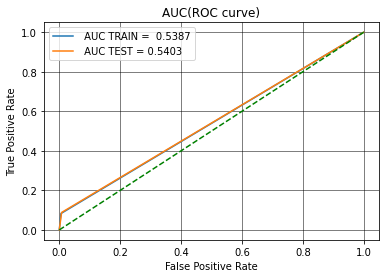

In [ ]:
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN =  %0.4f" %train_auc)
plt.plot(test_fpr, test_tpr, label=" AUC TEST = %0.4f" %test_auc)
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

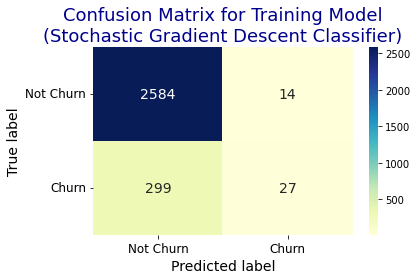

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Not Churn', 'Churn'), ('Not Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Stochastic Gradient Descent Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

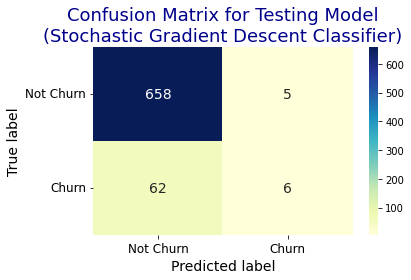

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Churn', 'Churn'), ('Not Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Stochastic Gradient Descent Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### **Algoritma Klasifikasi : Gradient Boosting Classifier**

---



In [ ]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))
print('\nF1 Score Training (Gradient Boosting Classifier): %.3f' % (f1_score(y_train, y_train_pred)))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
print('\nROC AUC Score Training (Gradient Boosting Classifier): %.3f' % train_auc)
print('\n')

#Train the model
# Predict
y_test_pred = gbt_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))
print('\nF1 Score Training (Gradient Boosting Classifier): %.3f' % (f1_score(y_test, y_test_pred)))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print('\nROC AUC Score Training (Gradient Boosting Classifier): %.3f' % test_auc)
print('\n')

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2598
         1.0       1.00      0.82      0.90       326

    accuracy                           0.98      2924
   macro avg       0.99      0.91      0.94      2924
weighted avg       0.98      0.98      0.98      2924


F1 Score Training (Gradient Boosting Classifier): 0.899

ROC AUC Score Training (Gradient Boosting Classifier): 0.908


Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       663
         1.0       0.91      0.75      0.82        68

    accuracy                           0.97       731
   macro avg       0.94      0.87      0.90       731
weighted avg       0.97      0.97      0.97       731


F1 Score Training (Gradient Boosting Classifier): 0.823

ROC AUC Score Training (Gradient Boosting Classifier

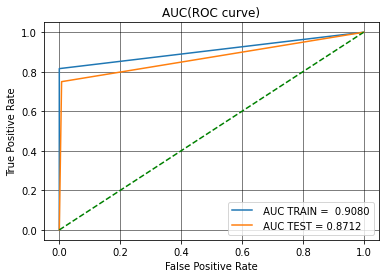

In [ ]:
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN =  %0.4f" %train_auc)
plt.plot(test_fpr, test_tpr, label=" AUC TEST = %0.4f" %test_auc)
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

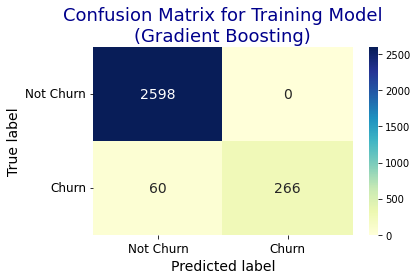

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Not Churn', 'Churn'), ('Not Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

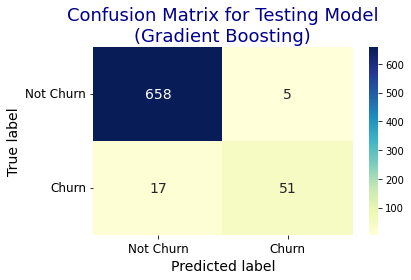

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Churn', 'Churn'), ('Not Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### **Algoritma Klasifikasi: RandomForestClassifier**

---



In [ ]:
#Train the model
rfc_model = RandomForestClassifier().fit(x_train, y_train)

# Predict
y_train_pred = rfc_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nF1 Score Training (Random Forest Classifier): %.3f' % (f1_score(y_train, y_train_pred)))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
print('\nROC AUC Score Training (Random Forest Classifier): %.3f' % train_auc)
print('\n')

#Train the model
# Predict
y_test_pred = rfc_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nF1 Score Training (Random Forest Classifier): %.3f' % (f1_score(y_test, y_test_pred)))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print('\nROC AUC Score Training (Random Forest Classifier): %.3f' % test_auc)
print('\n')

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2598
         1.0       1.00      1.00      1.00       326

    accuracy                           1.00      2924
   macro avg       1.00      1.00      1.00      2924
weighted avg       1.00      1.00      1.00      2924


F1 Score Training (Random Forest Classifier): 1.000

ROC AUC Score Training (Random Forest Classifier): 1.000


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       663
         1.0       1.00      0.65      0.79        68

    accuracy                           0.97       731
   macro avg       0.98      0.82      0.88       731
weighted avg       0.97      0.97      0.96       731


F1 Score Training (Random Forest Classifier): 0.786

ROC AUC Score Training (Random Forest Classifier):

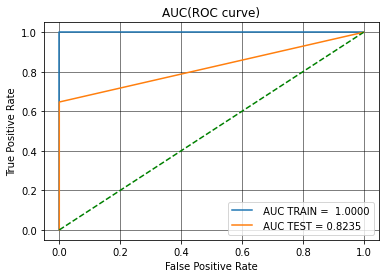

In [ ]:
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN =  %0.4f" %train_auc)
plt.plot(test_fpr, test_tpr, label=" AUC TEST = %0.4f" %test_auc)
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

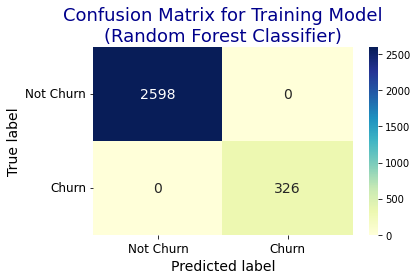

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Not Churn', 'Churn'), ('Not Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

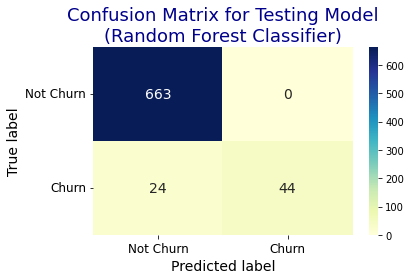

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Churn', 'Churn'), ('Not Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## **Predict for Data Test and Validation The Model**

---



In [ ]:
drop_cols = ['international_plan_2', 'voice_mail_plan_1', 'voice_mail_plan_2', 'international_plan','voice_mail_plan','churn']
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
Y_train = df_train['churn'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('Y_train shape: {}'.format(Y_train.shape[0]))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (3655, 14)
Y_train shape: 3655
X_test shape: (646, 14)


### **Stochastic Gradient Descent Classifier**

---


In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

SGDClassifier()

In [ ]:
y_test_pred = sgd.predict(X_test)
print(y_test_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(sgd, X_train, Y_train, cv=kfold, scoring = "f1")
print("F1 Stochastic Gradient Descent Classifier Scores:", scores)
print("F1 Stochastic Gradient Descent Classifier Mean:", scores.mean())
print("F1 Stochastic Gradient Descent Classifier Standard Deviation:", scores.std())
print("\n")
scores2 = cross_val_score(sgd, X_train, Y_train, cv=kfold, scoring = "roc_auc")
print("ROC AUC Stochastic Gradient Descent Classifier Scores:", scores2)
print("ROC AUC Stochastic Gradient Descent Classifier Mean:", scores2.mean())
print("ROC AUC Stochastic Gradient Descent Classifier Standard Deviation:", scores2.std())

F1 Stochastic Gradient Descent Classifier Scores: [0.48       0.42857143 0.4137931  0.48101266 0.45833333 0.34615385
 0.57142857 0.52173913 0.56521739 0.69047619]
F1 Stochastic Gradient Descent Classifier Mean: 0.49567256533786247
F1 Stochastic Gradient Descent Classifier Standard Deviation: 0.09198955924943168


ROC AUC Stochastic Gradient Descent Classifier Scores: [0.81028143 0.84955752 0.81033928 0.81680672 0.85645231 0.8369453
 0.84147186 0.83969097 0.89187656 0.87301587]
ROC AUC Stochastic Gradient Descent Classifier Mean: 0.842643782688042
ROC AUC Stochastic Gradient Descent Classifier Standard Deviation: 0.025270194759297104


### **Gradient Boosting**

---



In [ ]:
gbt = GradientBoostingClassifier()
gbt.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
y_test_pred = gbt.predict(X_test)
print(y_test_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(gbt, X_train, Y_train, cv=kfold, scoring = "f1")
print("F1 Gradient Boosting Scores:", scores)
print("F1 Gradient Boosting Mean:", scores.mean())
print("F1 Gradient Boosting Standard Deviation:", scores.std())
print("\n")
scores2 = cross_val_score(gbt, X_train, Y_train, cv=kfold, scoring = "roc_auc")
print("ROC AUC Gradient Boosting Scores:", scores2)
print("ROC AUC Gradient Boosting Mean:", scores2.mean())
print("ROC AUC Gradient Boosting Standard Deviation:", scores2.std())

F1 Gradient Boosting Scores: [0.7826087  0.88461538 0.7816092  0.86956522 0.8125     0.74666667
 0.87096774 0.75757576 0.92       0.77272727]
F1 Gradient Boosting Mean: 0.8198835931966343
F1 Gradient Boosting Standard Deviation: 0.05802320397816322


ROC AUC Gradient Boosting Scores: [0.87189493 0.8876871  0.86187472 0.89660753 0.92947777 0.89149344
 0.90835498 0.86745534 0.98615838 0.87619048]
ROC AUC Gradient Boosting Mean: 0.897719466868779
ROC AUC Gradient Boosting Standard Deviation: 0.035234872019608385


### **Random Forest Classifier**

---

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_test_pred = rfc.predict(X_test)
print(y_test_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(rfc, X_train, Y_train, cv=kfold, scoring = "f1")
print("F1 Random Forest Classifier Scores:", scores)
print("F1 Random Forest Classifier Mean:", scores.mean())
print("F1 Random Forest Classifier Standard Deviation:", scores.std())
print("\n")
scores2 = cross_val_score(rfc, X_train, Y_train, cv=kfold, scoring = "roc_auc")
print("ROC AUC Random Forest Classifier Scores:", scores2)
print("ROC AUC Random Forest Classifier Mean:", scores2.mean())
print("ROC AUC Random Forest Classifier Standard Deviation:", scores2.std())

F1 Random Forest Classifier Scores: [0.6984127  0.83333333 0.74358974 0.78571429 0.81967213 0.76056338
 0.79310345 0.76190476 0.7826087  0.7654321 ]
F1 Random Forest Classifier Mean: 0.7744334577077522
F1 Random Forest Classifier Standard Deviation: 0.036358293882692364


ROC AUC Random Forest Classifier Scores: [0.8708818  0.89741069 0.86605936 0.88664799 0.92727665 0.89908595
 0.90926407 0.84323193 0.96664398 0.90006349]
ROC AUC Random Forest Classifier Mean: 0.8966565907050155
ROC AUC Random Forest Classifier Standard Deviation: 0.03250806760165861
